In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('hotel_bookings.csv')

# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
missing_values


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 1
children                               4
babies                                 0
meal                                   0
country                              507
market_segment                         2
distribution_channel                   1
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     1
assigned_room_type                     1
booking_changes                        0
deposit_type                          21
agent                              16340
company         

In [2]:
# Drop rows with missing values in columns with only a few missing values
columns_to_dropna = ['adults', 'children', 'market_segment', 'distribution_channel', 
                     'reserved_room_type', 'assigned_room_type', 'reservation_status']
df.dropna(subset=columns_to_dropna, inplace=True)

# Impute missing values
# For numerical columns, we can use the mean or median
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['deposit_type'].fillna(df['deposit_type'].mode()[0], inplace=True)
df['customer_type'].fillna(df['customer_type'].mode()[0], inplace=True)

# Drop columns 'agent' and 'company' due to the high number of missing values
df.drop(columns=['agent', 'company'], inplace=True)

# Verify if there are still any missing values
missing_values_after = df.isnull().sum()

# Display the remaining missing values
missing_values_after


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [3]:
initial_shape = df.shape
df.drop_duplicates(inplace=True)
duplicates_removed = initial_shape[0] - df.shape[0]

In [4]:
duplicates_removed

32035

### Identify and handle outliers


In [5]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
outliers_summary = df[numerical_columns].apply(detect_outliers_iqr).sum()

# Handle outliers by capping them to the 1.5*IQR boundary
def cap_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data.clip(lower_bound, upper_bound)

df[numerical_columns] = df[numerical_columns].apply(cap_outliers_iqr)

# Check for inconsistencies in the data
# For simplicity, we'll look at unique values in categorical columns and general statistics in numerical columns

categorical_columns = df.select_dtypes(include=['object']).columns
categorical_summary = {col: df[col].unique() for col in categorical_columns}

# Display the results
duplicates_removed, outliers_summary, categorical_summary

(32035,
 is_canceled                           0
 lead_time                          2397
 arrival_date_year                     0
 arrival_date_week_number              0
 arrival_date_day_of_month             0
 stays_in_weekend_nights             220
 stays_in_week_nights               1530
 adults                            22876
 children                           8362
 babies                              912
 is_repeated_guest                  3415
 previous_cancellations             1685
 previous_bookings_not_canceled     3545
 booking_changes                   15897
 days_in_waiting_list                861
 adr                                2487
 required_car_parking_spaces        7312
 total_of_special_requests          2672
 dtype: int64,
 {'hotel': array(['Resort Hotel', 'City Hotel'], dtype=object),
  'arrival_date_month': array(['July', 'August', 'September', 'October', 'November', 'December',
         'January', 'February', 'March', 'April', 'May', 'June'],
        dtyp

### check for inconsistencies


In [6]:
# Check for inconsistencies in numerical columns
numerical_summary = df[numerical_columns].describe()

# Check for invalid values or typos in categorical columns
categorical_inconsistencies = {col: df[col].value_counts() for col in categorical_columns}

# Display the results
numerical_summary, categorical_inconsistencies


(        is_canceled     lead_time  arrival_date_year  \
 count  87344.000000  87344.000000       87344.000000   
 mean       0.274982     78.399100        2016.210432   
 std        0.446508     81.061906           0.685992   
 min        0.000000      0.000000        2015.000000   
 25%        0.000000     11.000000        2016.000000   
 50%        0.000000     49.000000        2016.000000   
 75%        1.000000    125.000000        2017.000000   
 max        1.000000    296.000000        2017.000000   
 
        arrival_date_week_number  arrival_date_day_of_month  \
 count              87344.000000               87344.000000   
 mean                  26.840470                  15.815900   
 std                   13.673917                   8.834556   
 min                    1.000000                   1.000000   
 25%                   16.000000                   8.000000   
 50%                   27.000000                  16.000000   
 75%                   37.000000            

# Descriptive statistics

### Calculate summary statistics

In [7]:
# Calculate summary statistics (mean, median, standard deviation, min, max) for numerical columns
summary_stats_basic = df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                          'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'adr',
                          'required_car_parking_spaces', 'total_of_special_requests']].agg(['mean', 'median', 'std', 'min', 'max'])

# Calculate mode for numerical columns separately
summary_stats_mode = df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                         'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'adr',
                         'required_car_parking_spaces', 'total_of_special_requests']].mode().T
summary_stats_mode.columns = ['mode']

# Display the basic summary statistics and mode
summary_stats_basic, summary_stats_mode


(         lead_time  stays_in_weekend_nights  stays_in_week_nights  adults  \
 mean     78.399100                 0.999313              2.577384     2.0   
 median   49.000000                 1.000000              2.000000     2.0   
 std      81.061906                 0.994403              1.807335     0.0   
 min       0.000000                 0.000000              0.000000     2.0   
 max     296.000000                 5.000000              8.500000     2.0   
 
         children  babies  previous_cancellations  \
 mean         0.0     0.0                     0.0   
 median       0.0     0.0                     0.0   
 std          0.0     0.0                     0.0   
 min          0.0     0.0                     0.0   
 max          0.0     0.0                     0.0   
 
         previous_bookings_not_canceled  days_in_waiting_list         adr  \
 mean                               0.0                   0.0  105.359745   
 median                             0.0                 

### define categorical columns to analyze

In [8]:
catregorical_columns = [
    'hotel', 'country', 'market_segment', 'distribution_channel', 
    'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 
    'deposit_type', 'customer_type', 'reservation_status'
]

#calculate value_counts anf frequencies for each categorical column
value_counts_and_frequencies = {col: df[col].value_counts(normalize = True) for col in categorical_columns}

#display the results
value_counts_and_frequencies

{'hotel': hotel
 City Hotel      0.611536
 Resort Hotel    0.388464
 Name: proportion, dtype: float64,
 'arrival_date_month': arrival_date_month
 August       0.128778
 July         0.115028
 May          0.095633
 April        0.090481
 June         0.088890
 March        0.085959
 October      0.079410
 September    0.076571
 February     0.069713
 December     0.058699
 November     0.057153
 January      0.053684
 Name: proportion, dtype: float64,
 'meal': meal
 BB           0.777775
 SC           0.108536
 HB           0.103968
 Undefined    0.005610
 FB           0.004110
 Name: proportion, dtype: float64,
 'country': country
 PRT    0.319049
 GBR    0.119424
 FRA    0.101175
 ESP    0.083005
 DEU    0.061653
          ...   
 MMR    0.000011
 BFA    0.000011
 CYM    0.000011
 MLI    0.000011
 KHM    0.000011
 Name: proportion, Length: 177, dtype: float64,
 'market_segment': market_segment
 Online TA        0.590813
 Offline TA/TO    0.158843
 Direct           0.135041
 Groups   

# Data visualization

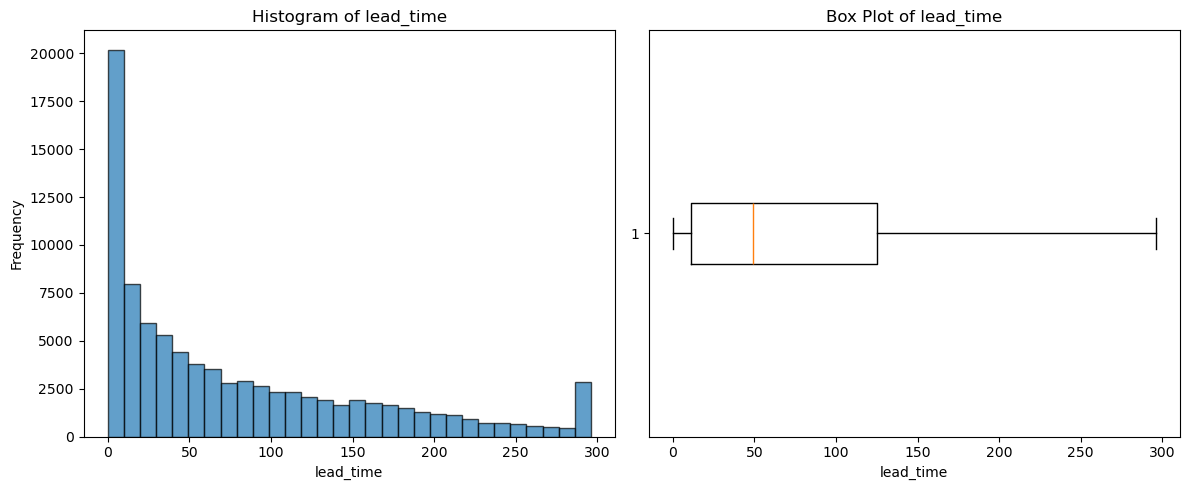

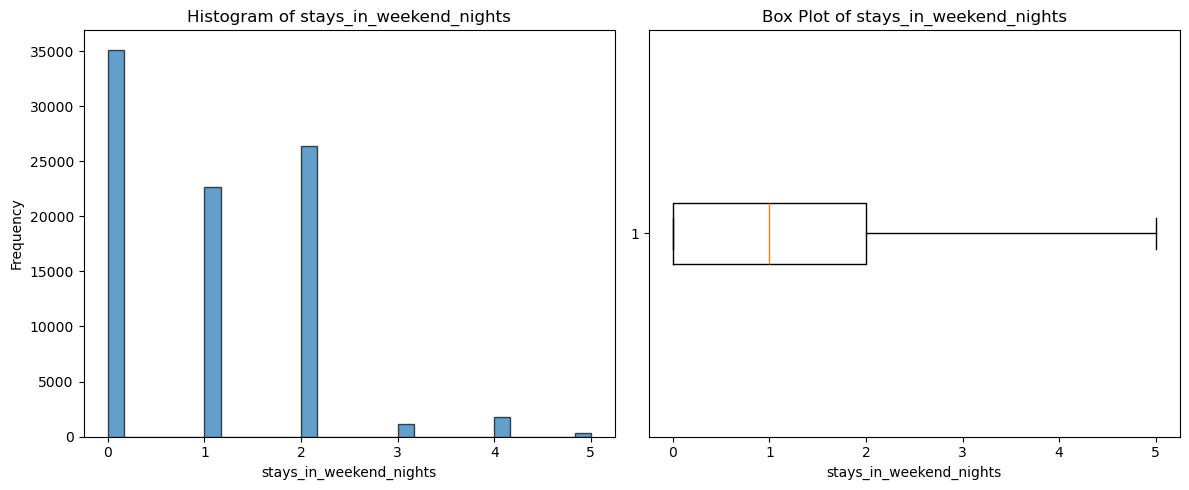

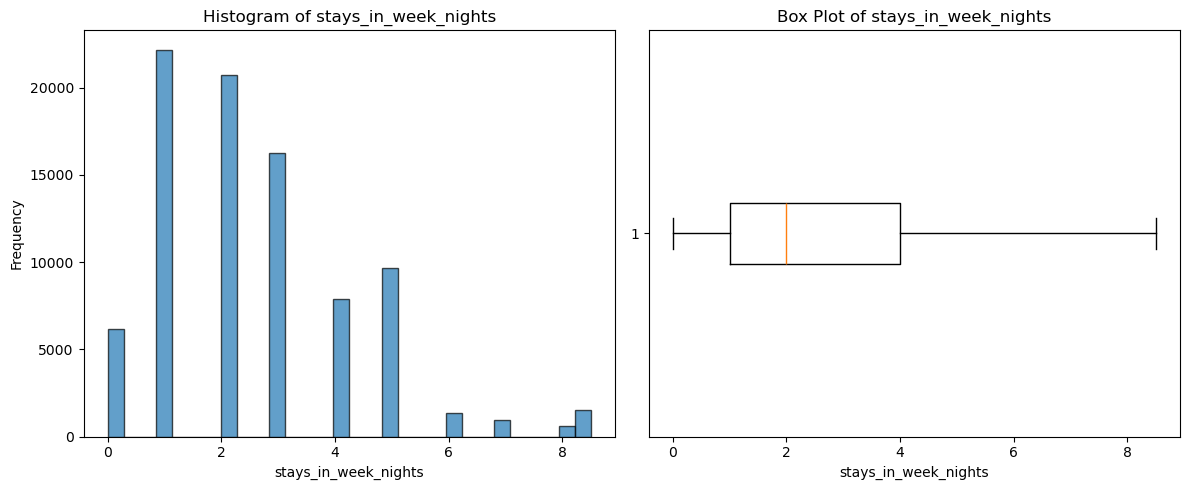

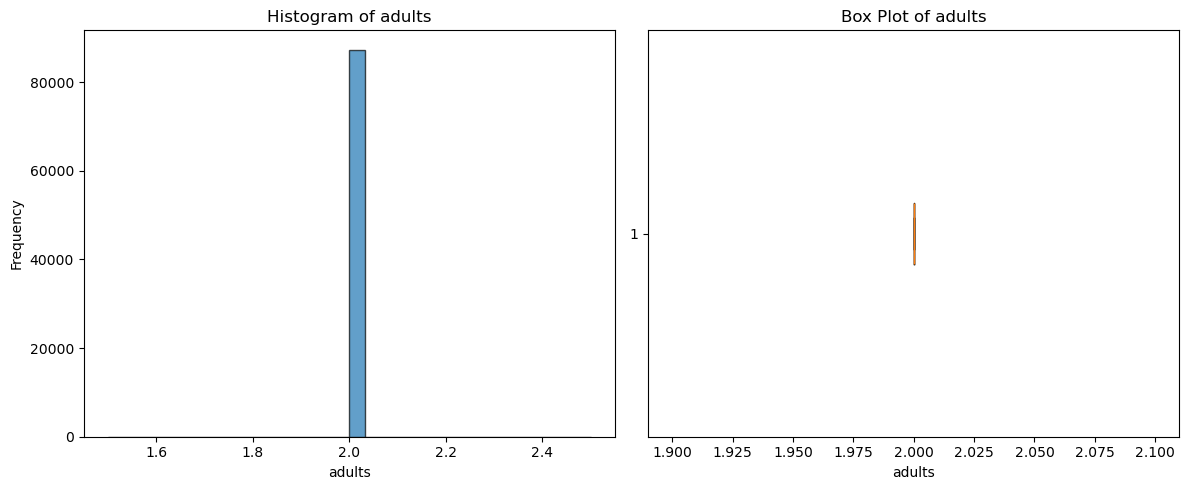

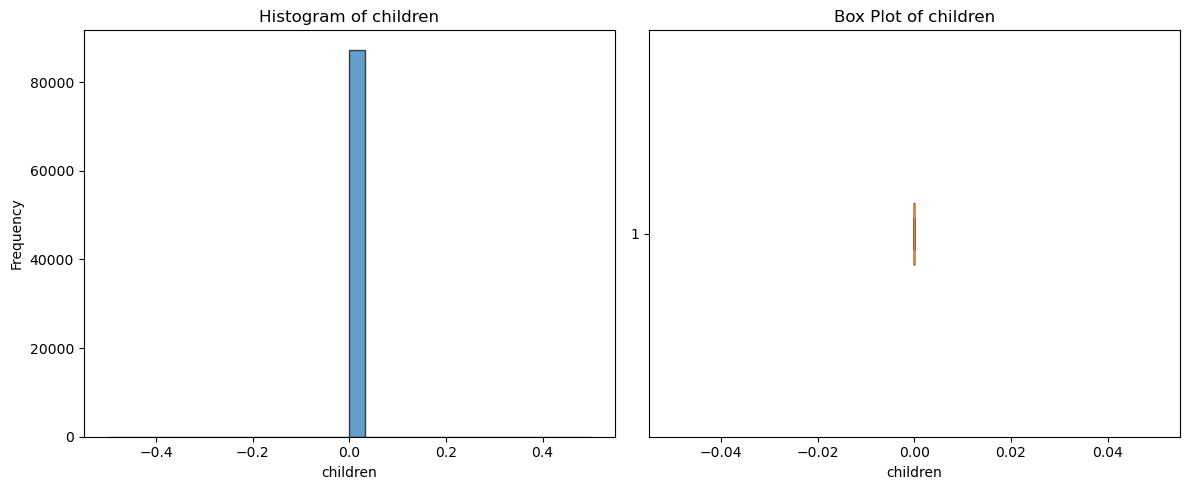

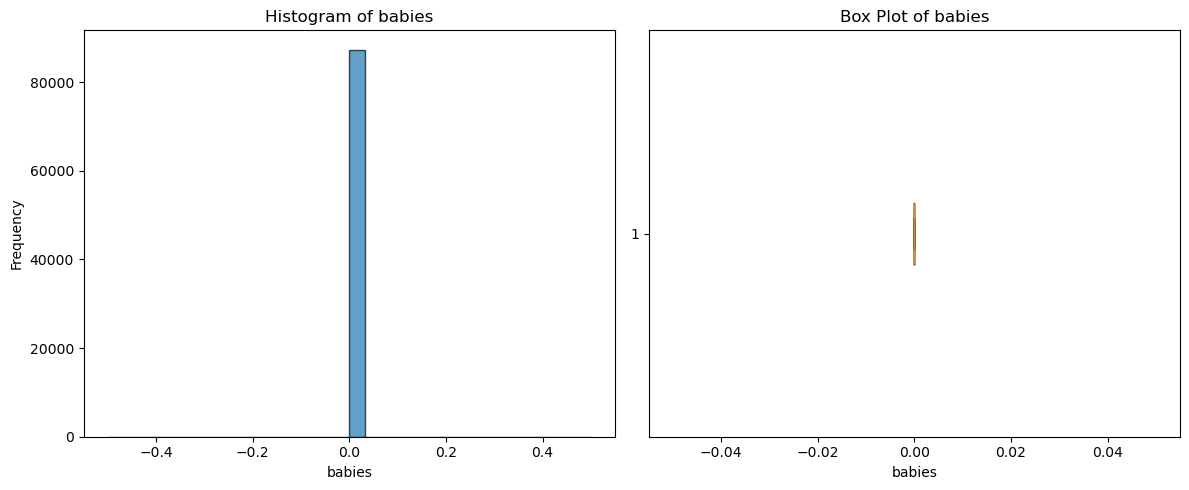

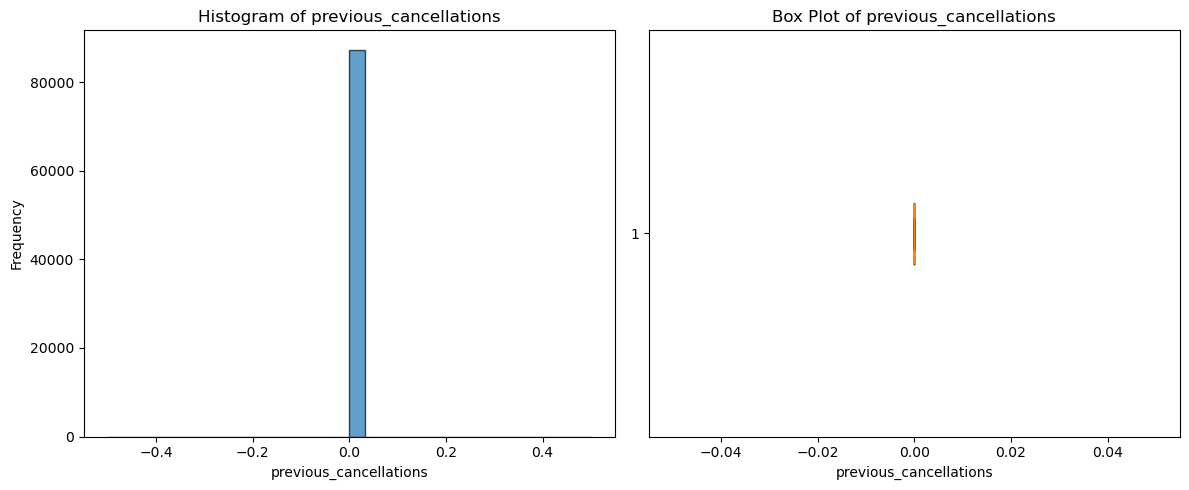

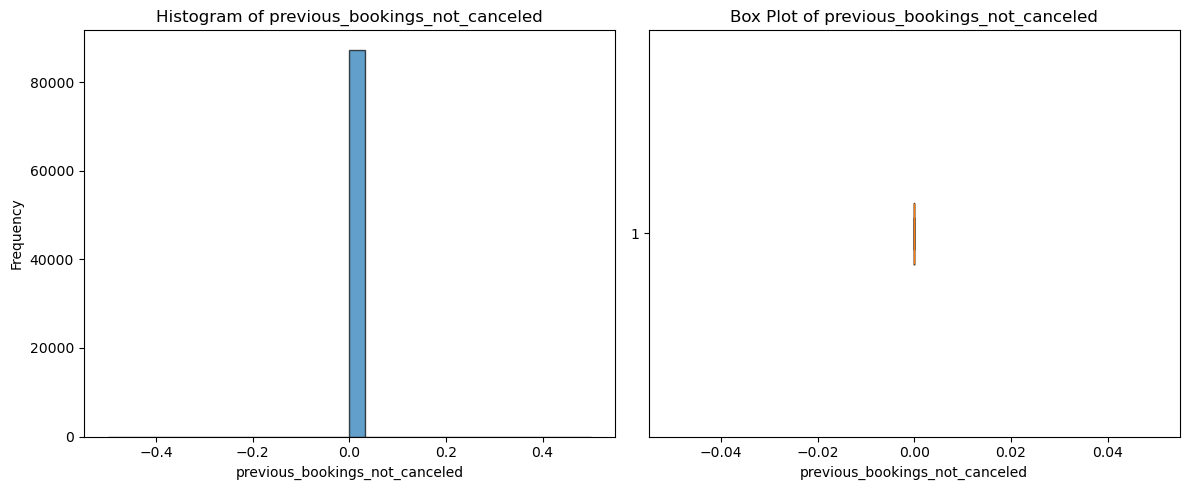

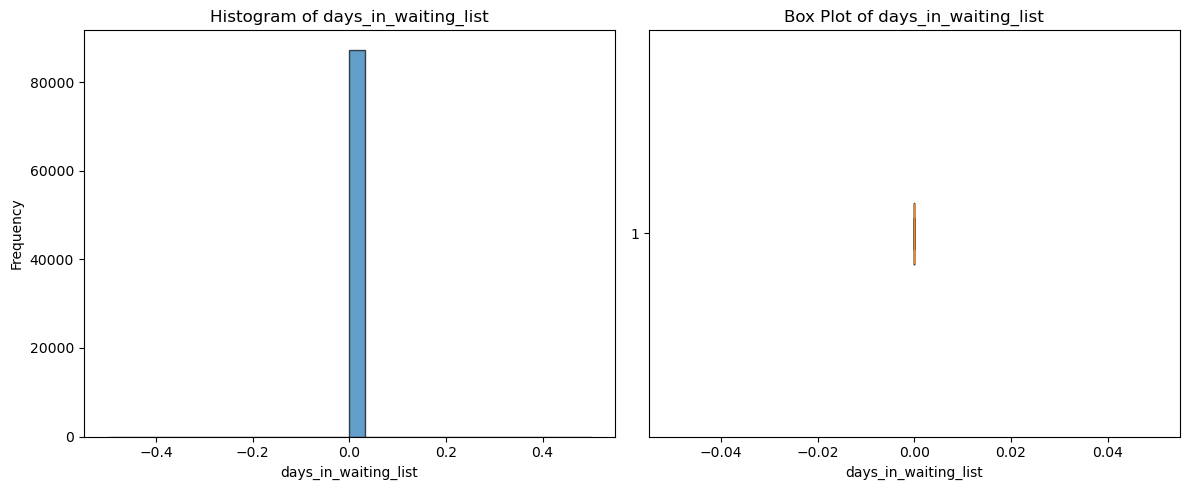

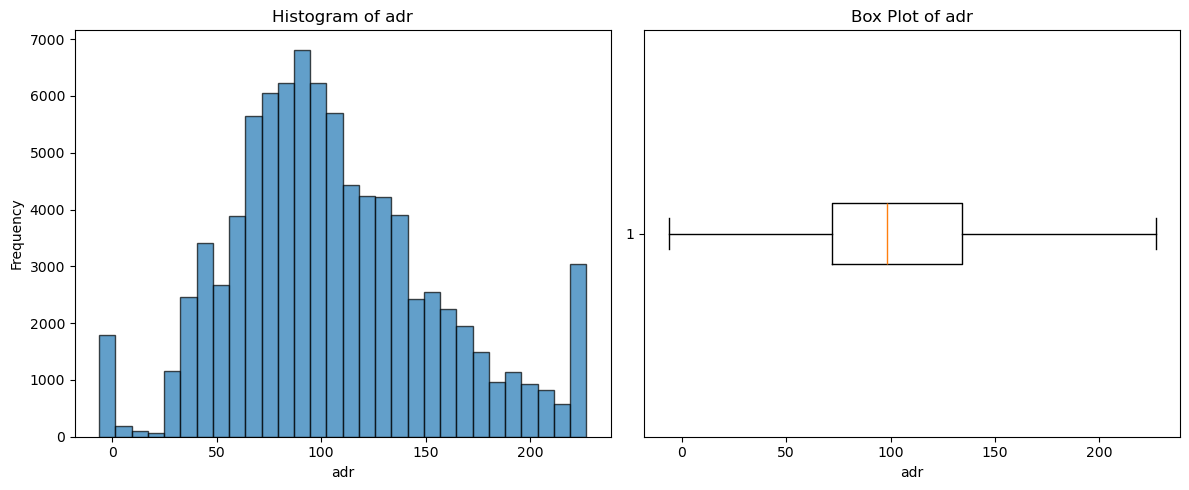

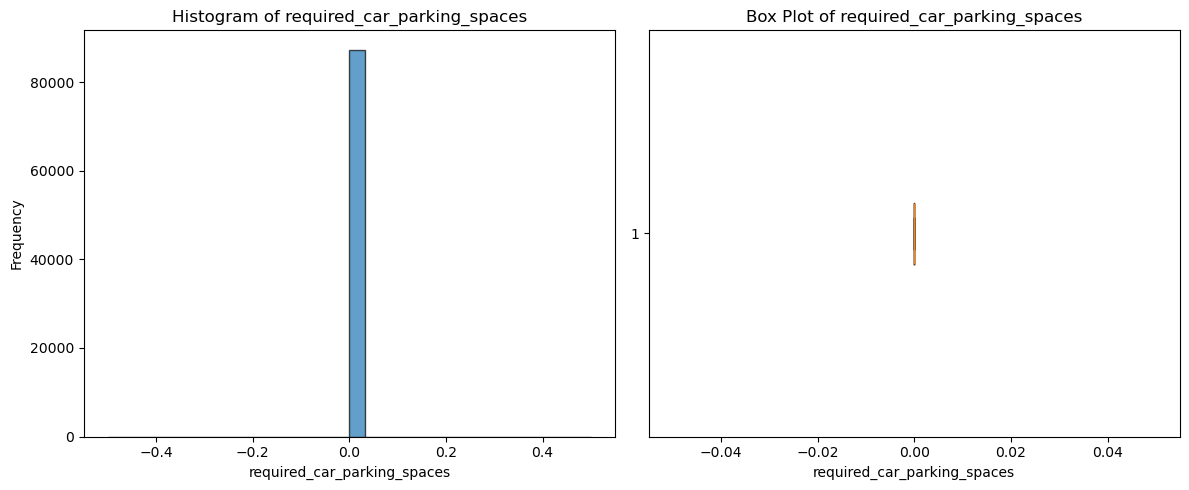

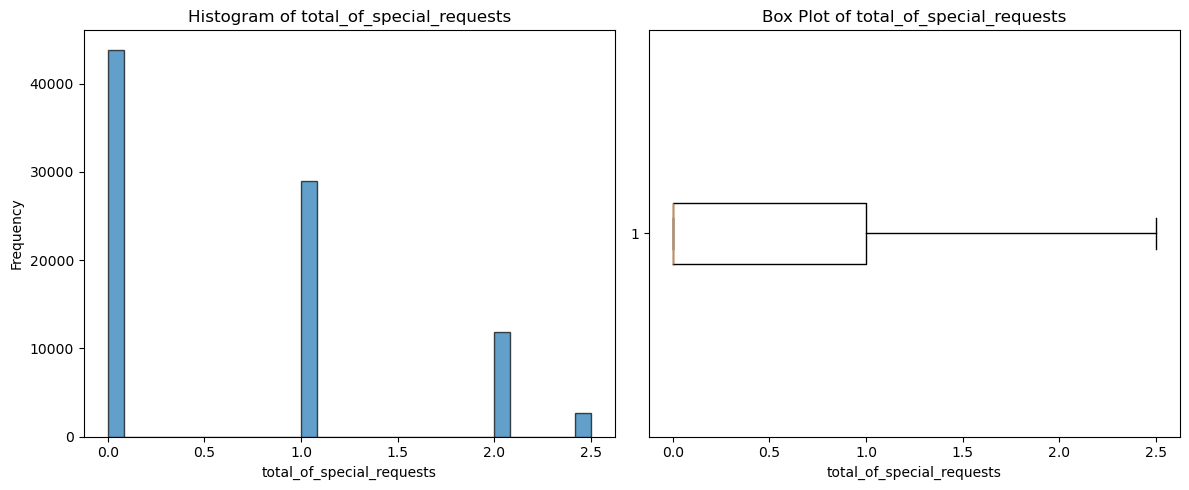

In [9]:
import matplotlib.pyplot as plt

# List of numerical columns to visualize
numerical_columns = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
    'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'adr',
    'required_car_parking_spaces', 'total_of_special_requests'
]

# Create histograms and box plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Box Plot
    plt.subplot(1, 2, 2)
    plt.boxplot(df[column], vert=False)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()


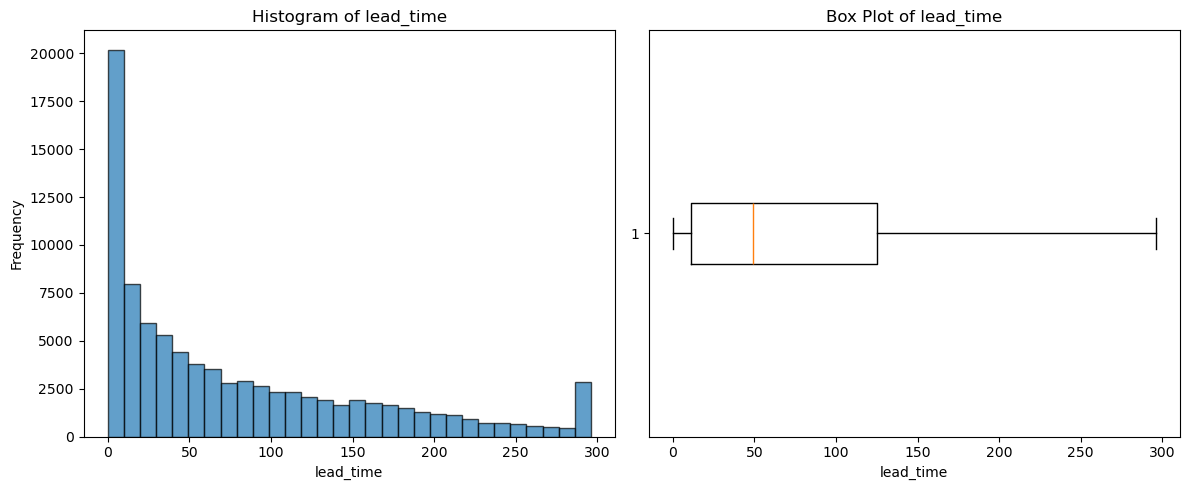

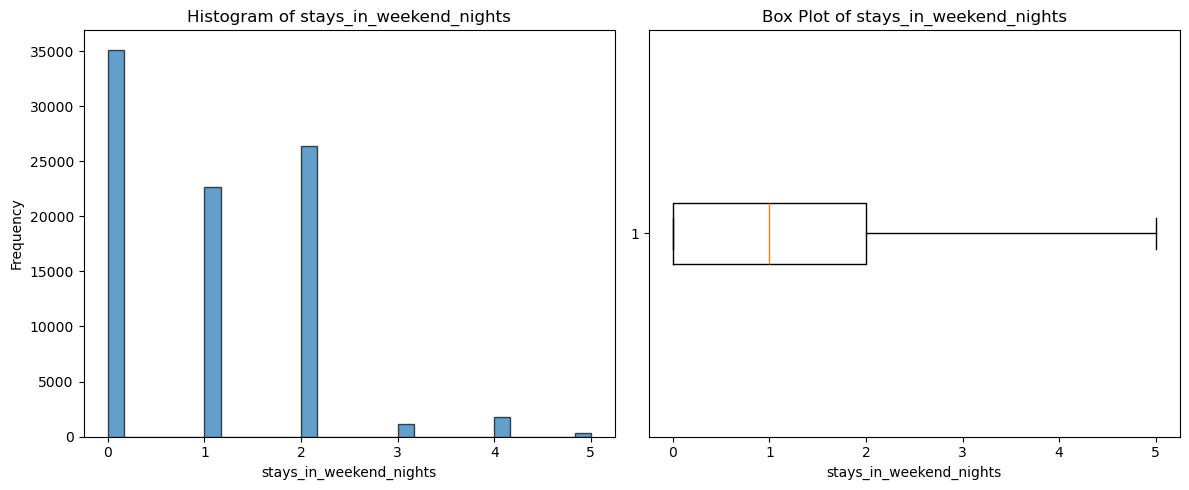

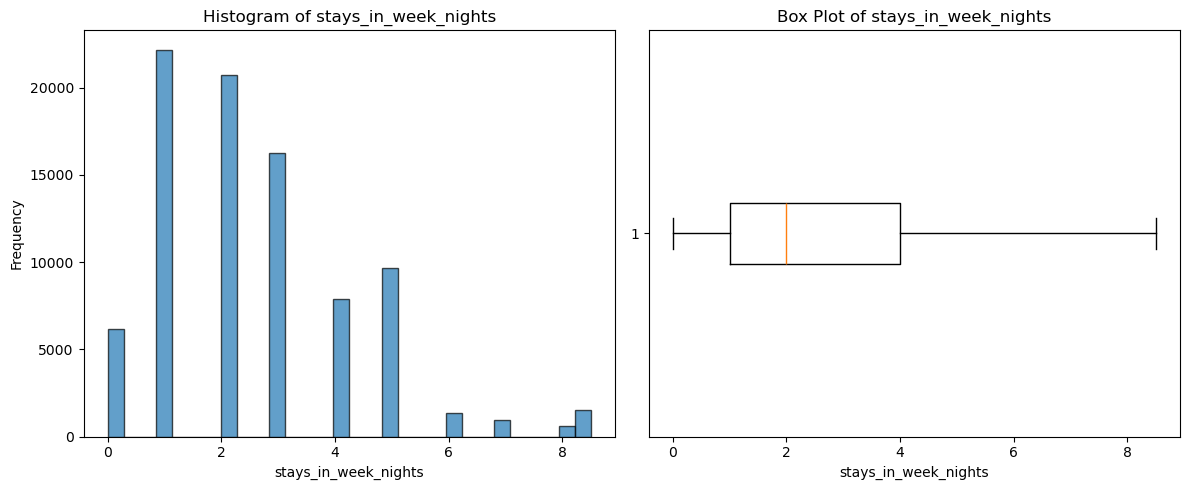

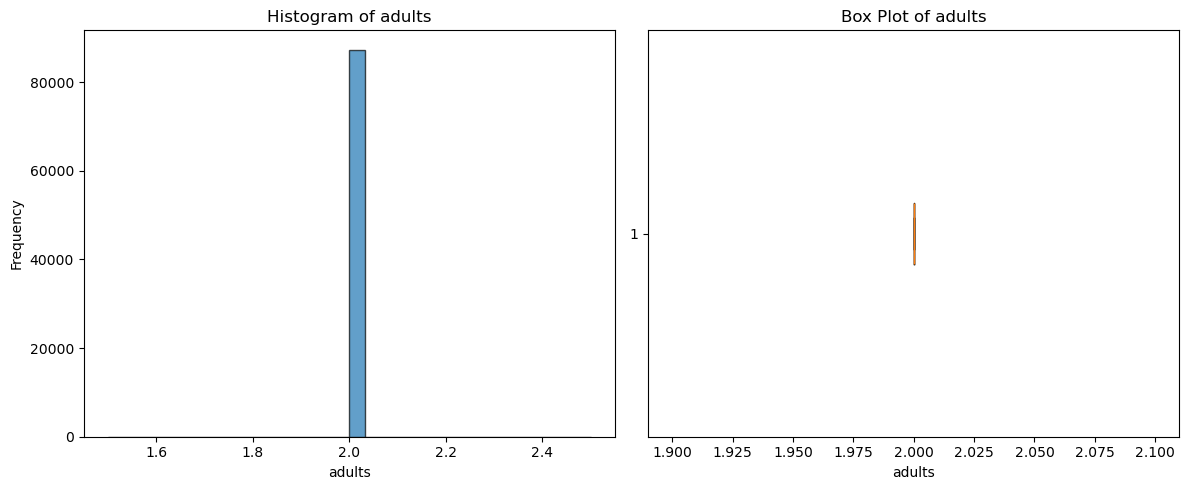

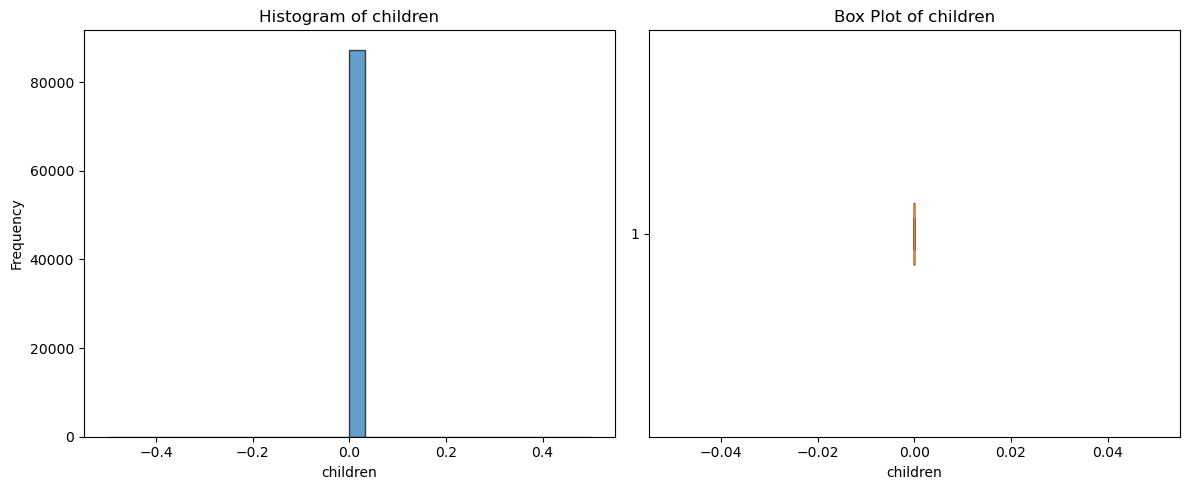

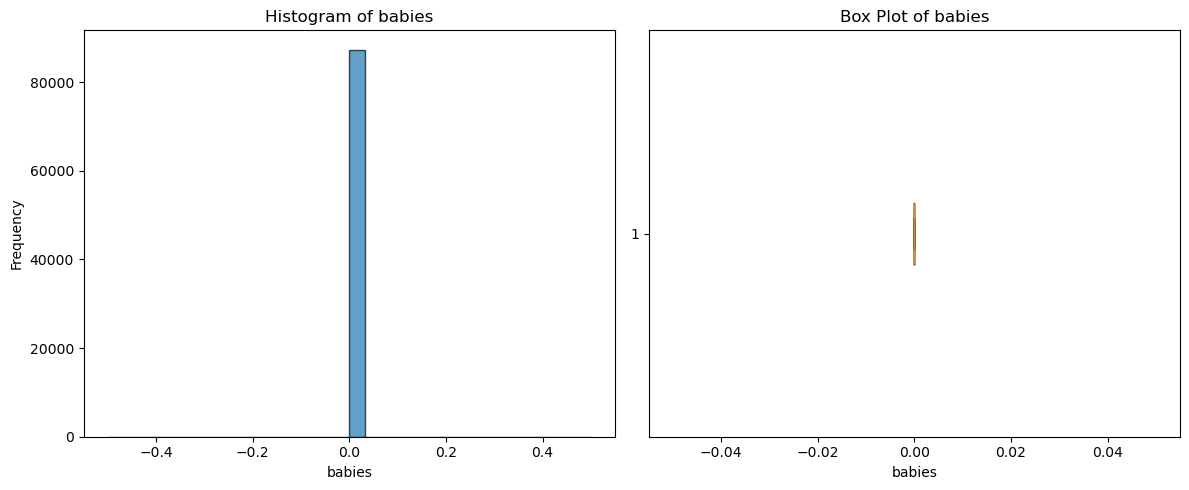

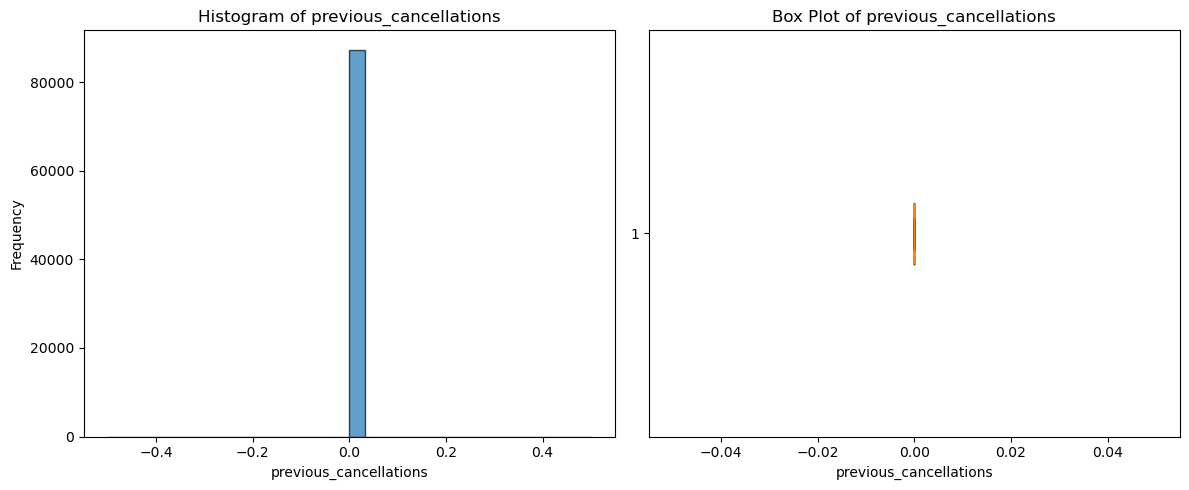

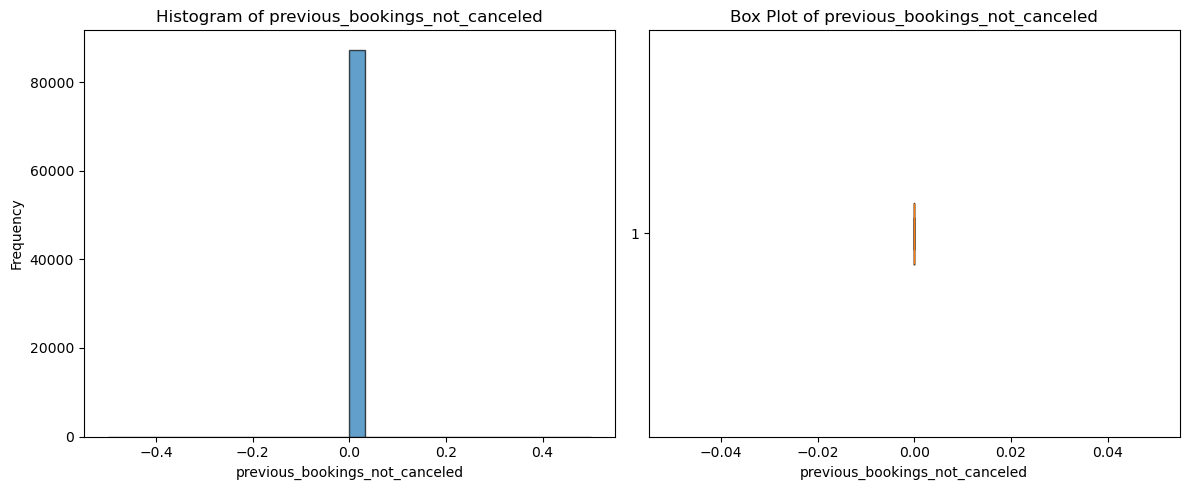

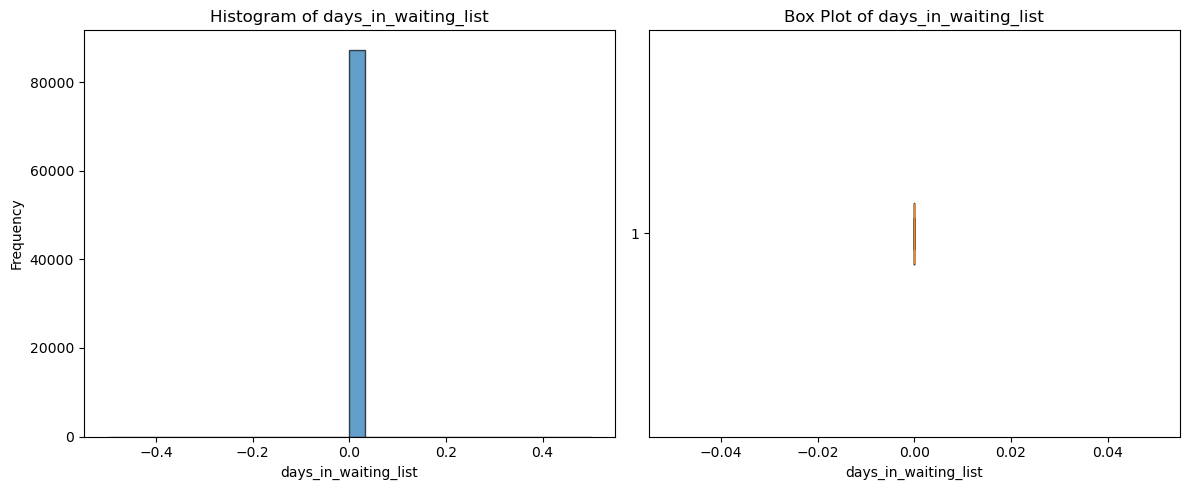

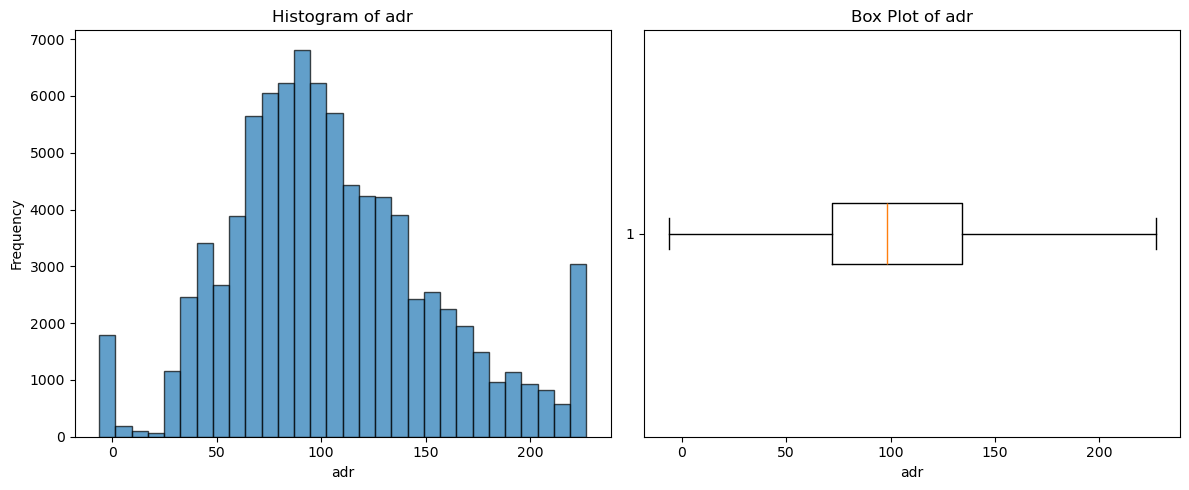

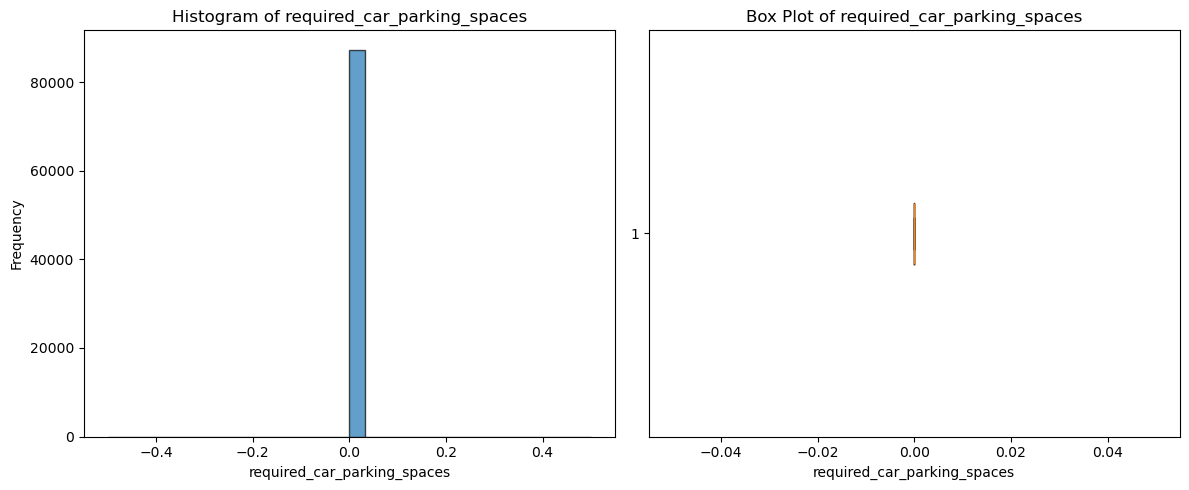

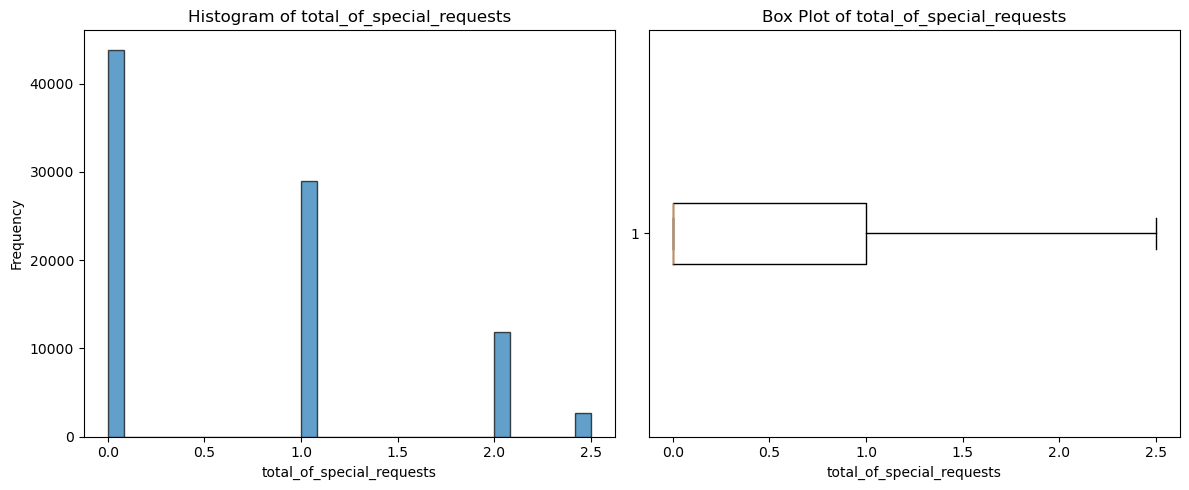

In [10]:
import matplotlib.pyplot as plt

# List of numerical columns to visualize
numerical_columns = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
    'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'adr',
    'required_car_parking_spaces', 'total_of_special_requests'
]

# Create histograms and box plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Box Plot
    plt.subplot(1, 2, 2)
    plt.boxplot(df[column], vert=False)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()


### Use bar plots or pie charts to visualize the distribution of categorical columns.

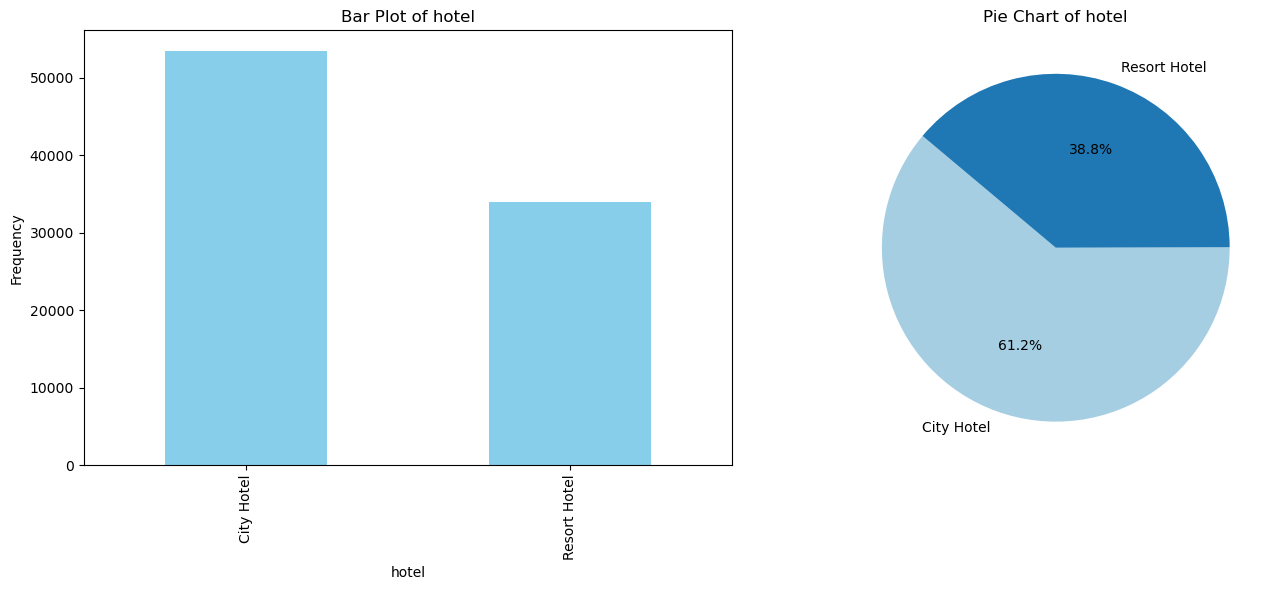

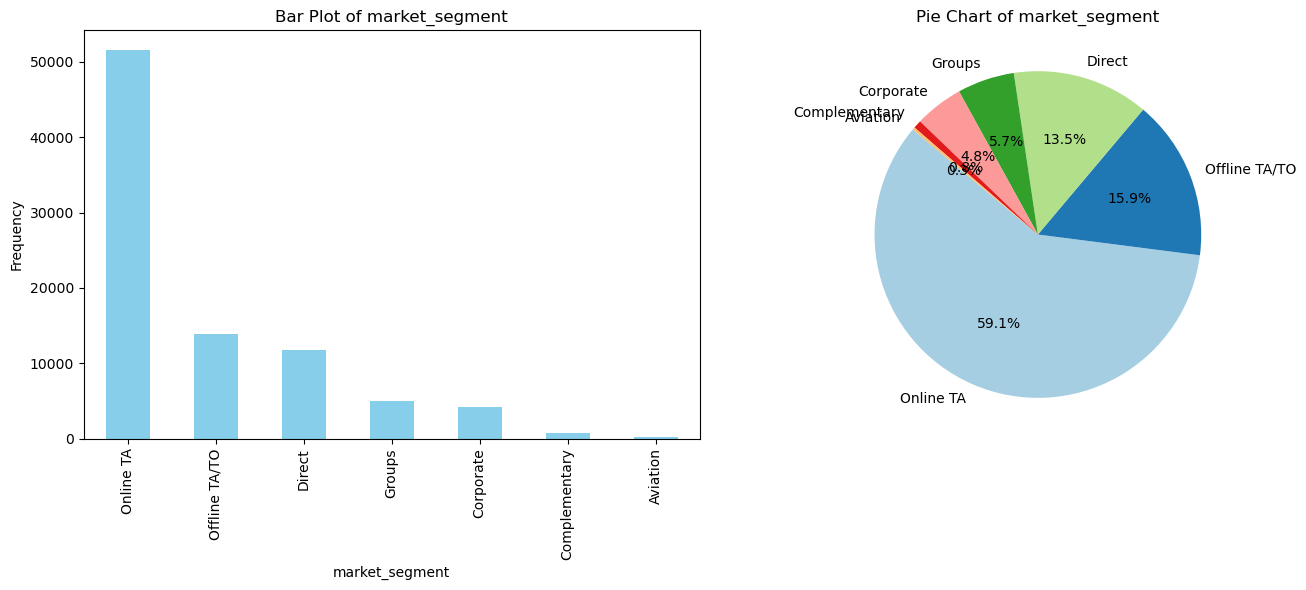

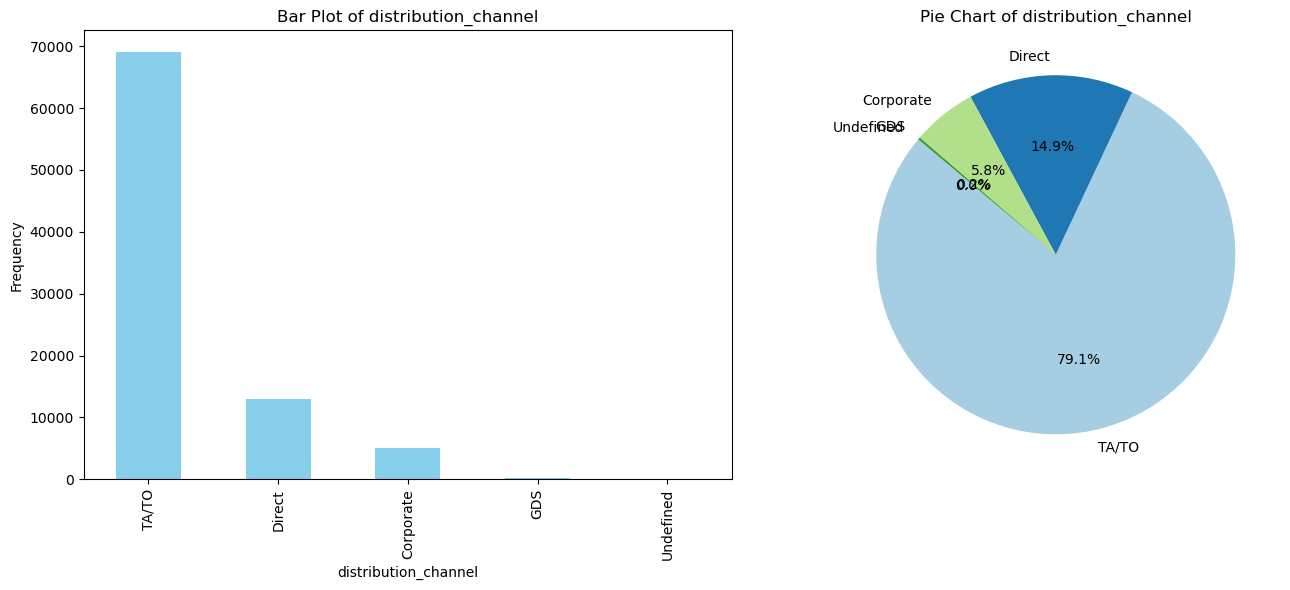

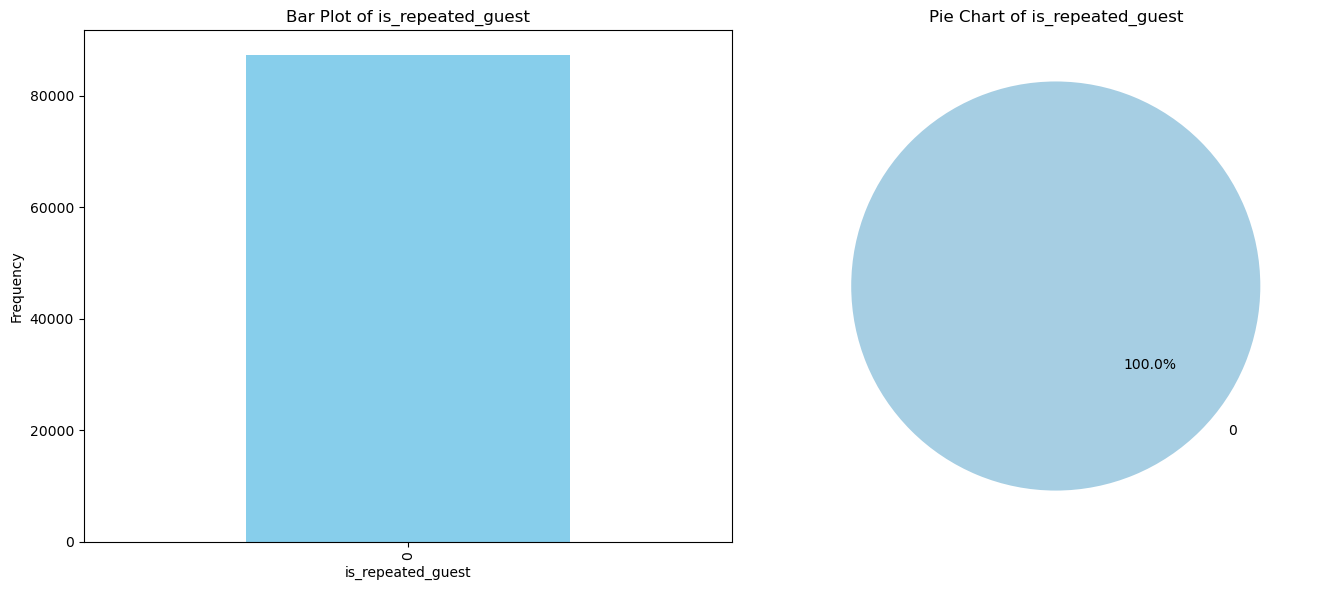

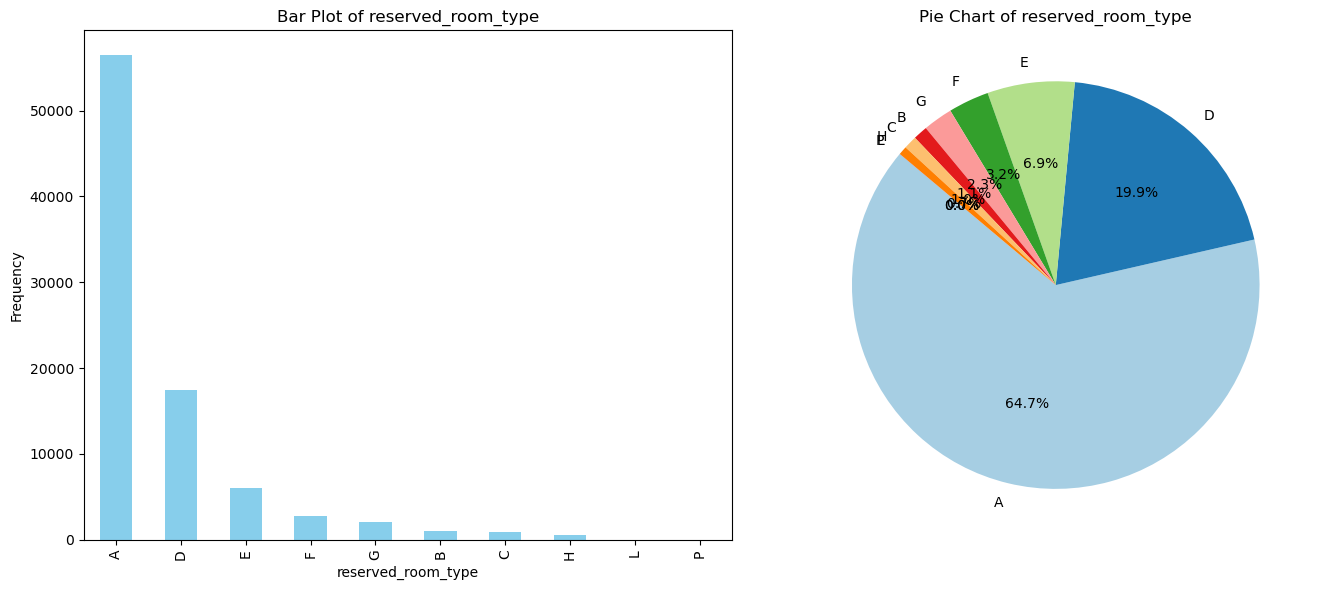

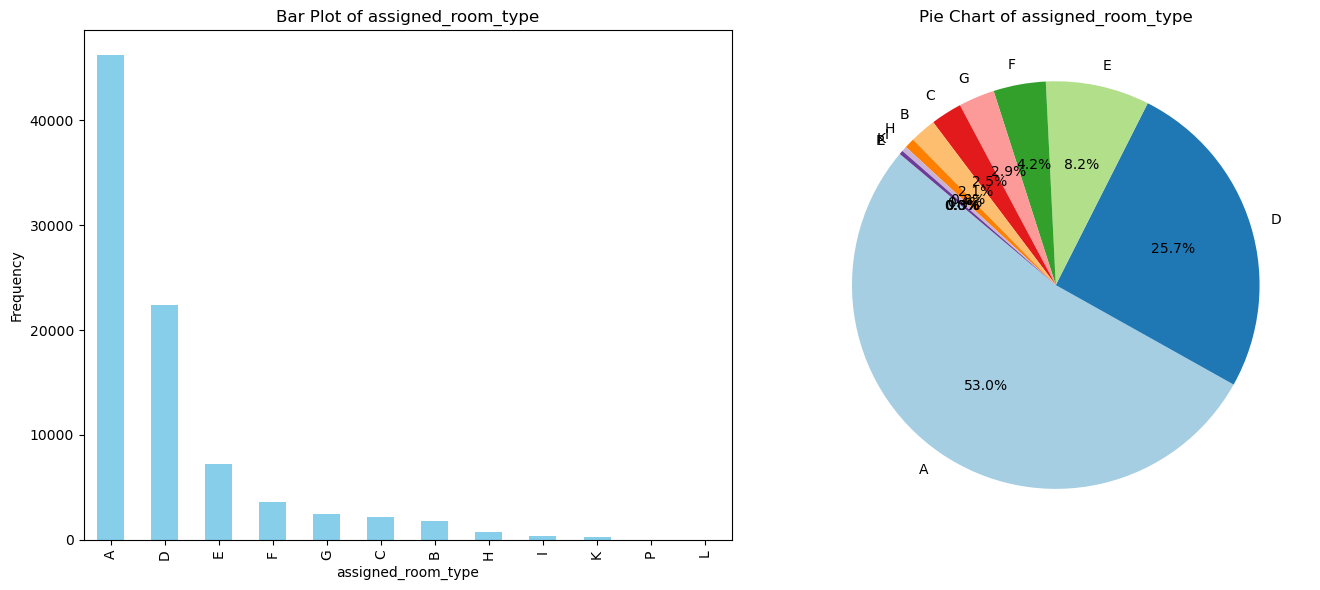

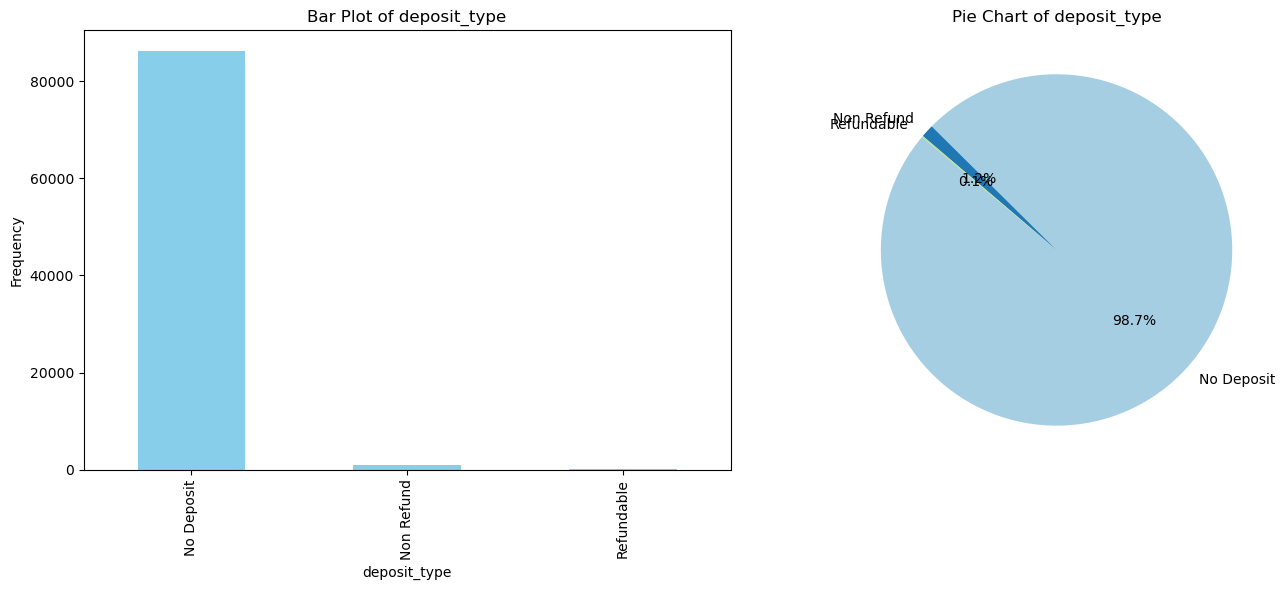

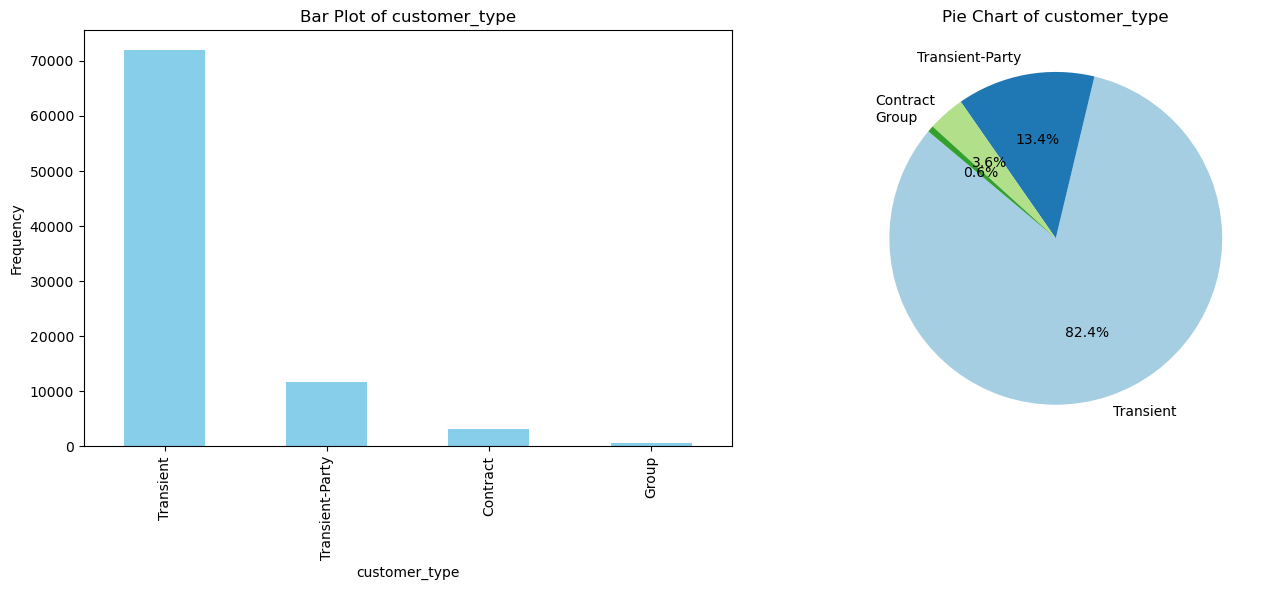

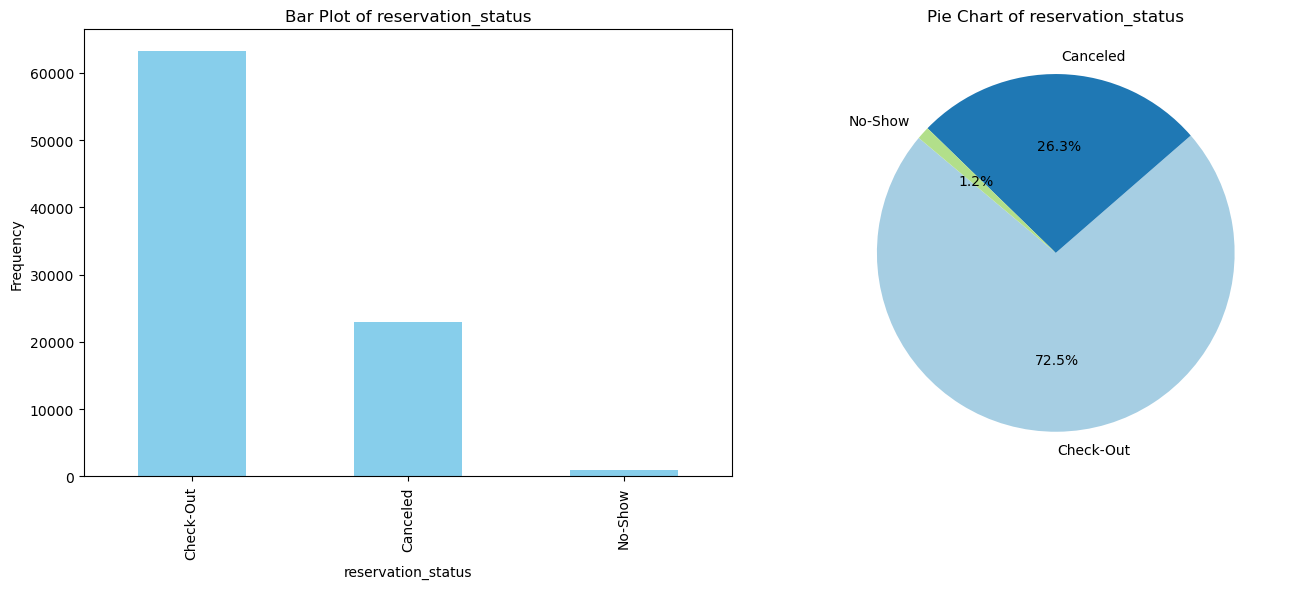

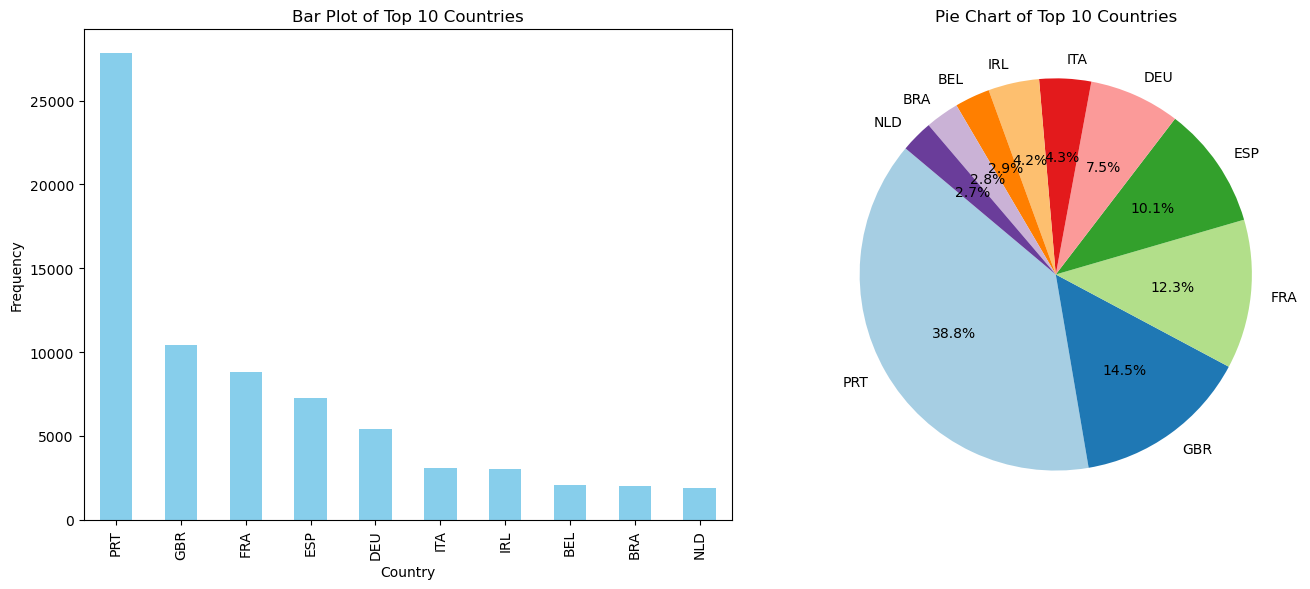

In [11]:
import matplotlib.pyplot as plt

# Define the categorical columns to visualize
categorical_columns = [
    'hotel', 'market_segment', 'distribution_channel', 
    'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 
    'deposit_type', 'customer_type', 'reservation_status'
]

# Function to create bar plots and pie charts
def create_bar_and_pie_charts(column, title):
    plt.figure(figsize=(14, 6))
    
    # Bar Plot
    plt.subplot(1, 2, 1)
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Plot of {title}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Pie Chart
    plt.subplot(1, 2, 2)
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f'Pie Chart of {title}')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

# Create bar plots and pie charts for each categorical column
for column in categorical_columns:
    create_bar_and_pie_charts(column, column)

# Special case for 'country' (top 10)
top_10_countries = df['country'].value_counts().nlargest(10)
plt.figure(figsize=(14, 6))

# Bar Plot for Top 10 Countries
plt.subplot(1, 2, 1)
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Bar Plot of Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Frequency')

# Pie Chart for Top 10 Countries
plt.subplot(1, 2, 2)
top_10_countries.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Pie Chart of Top 10 Countries')
plt.ylabel('')

plt.tight_layout()
plt.show()


### Create scatter plots or heatmaps to explore relationships between numerical columns.


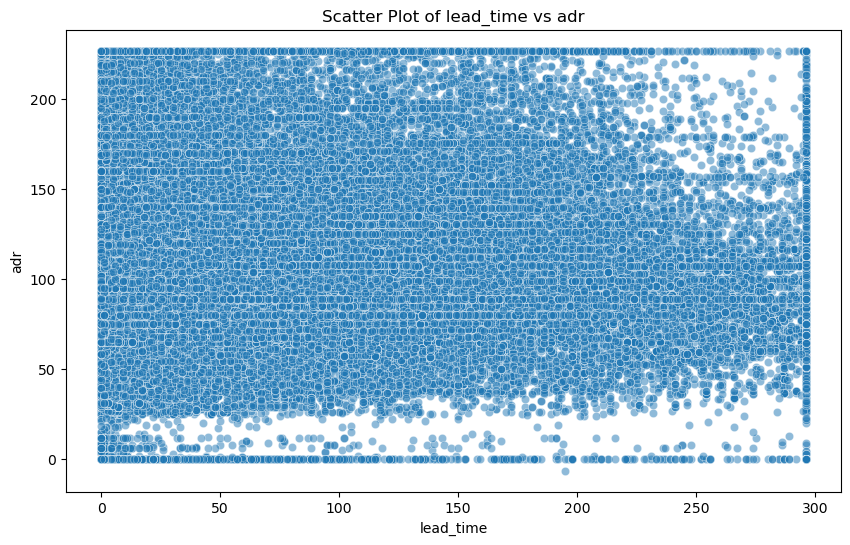

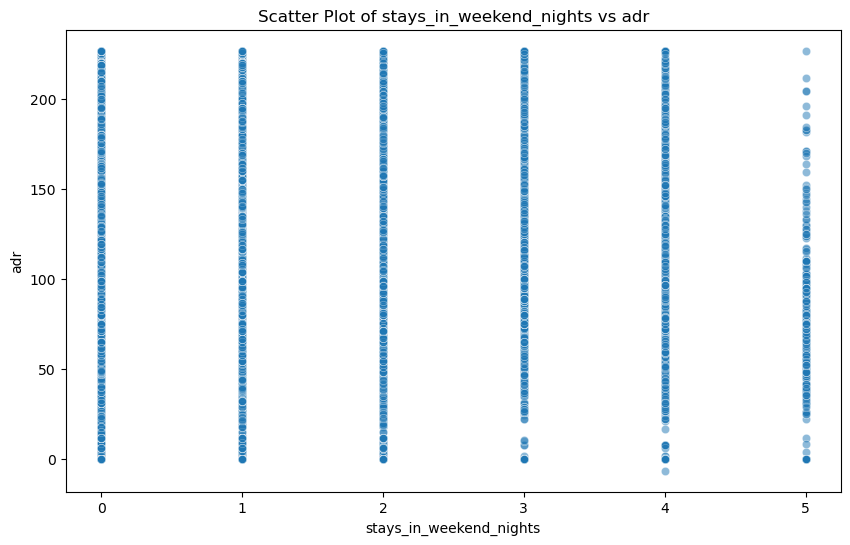

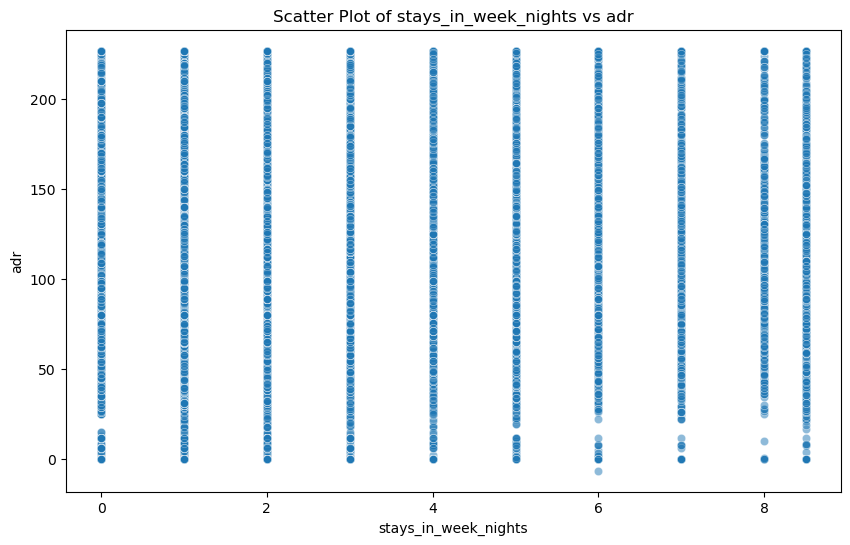

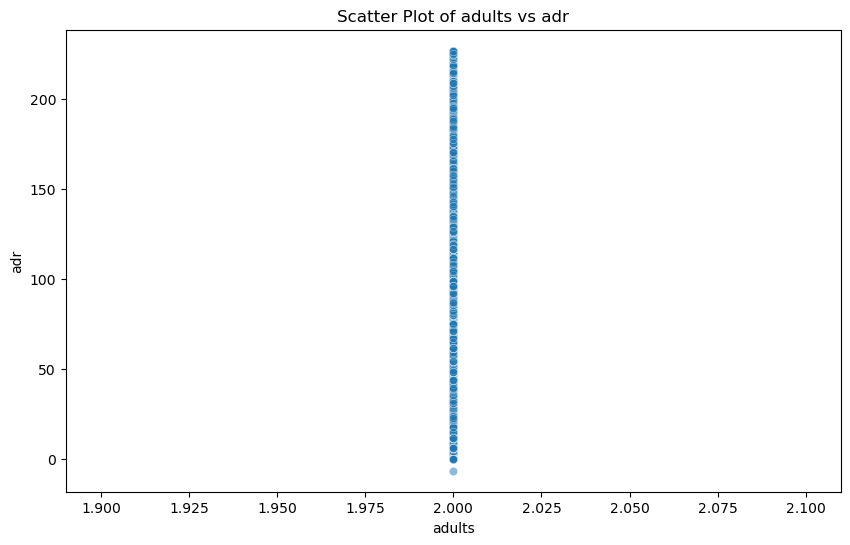

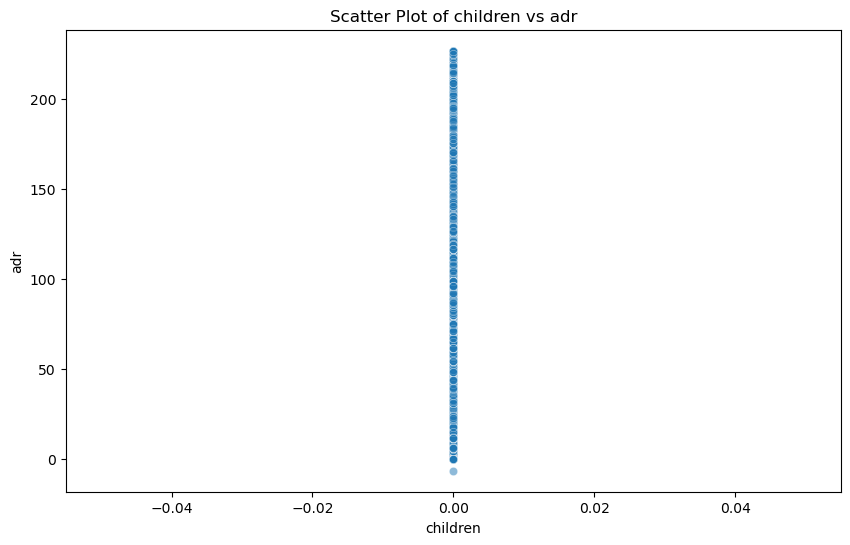

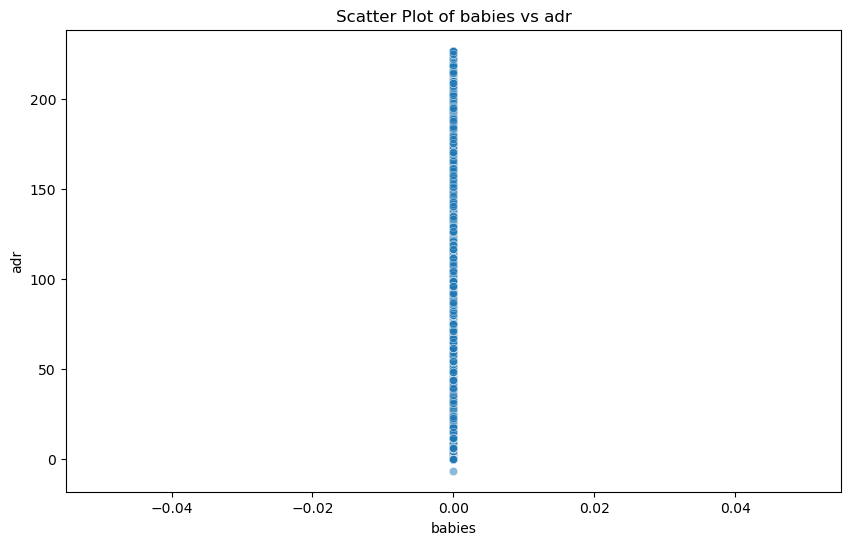

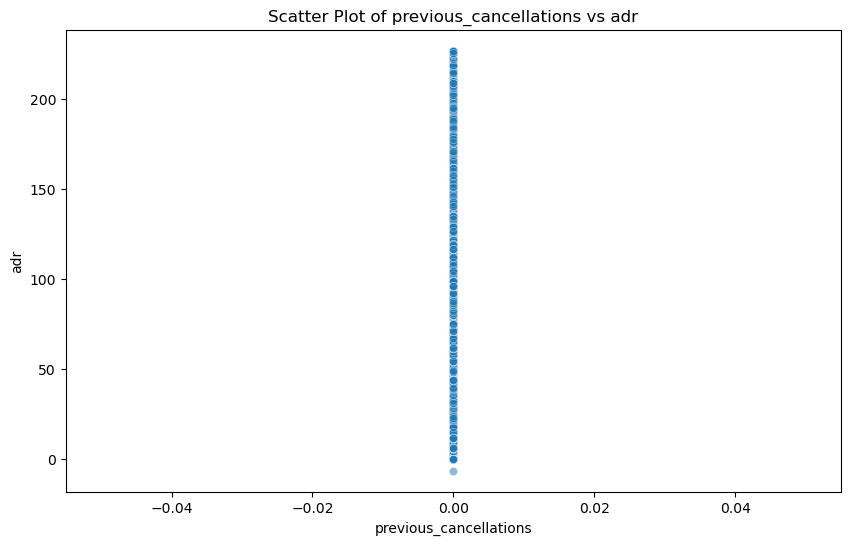

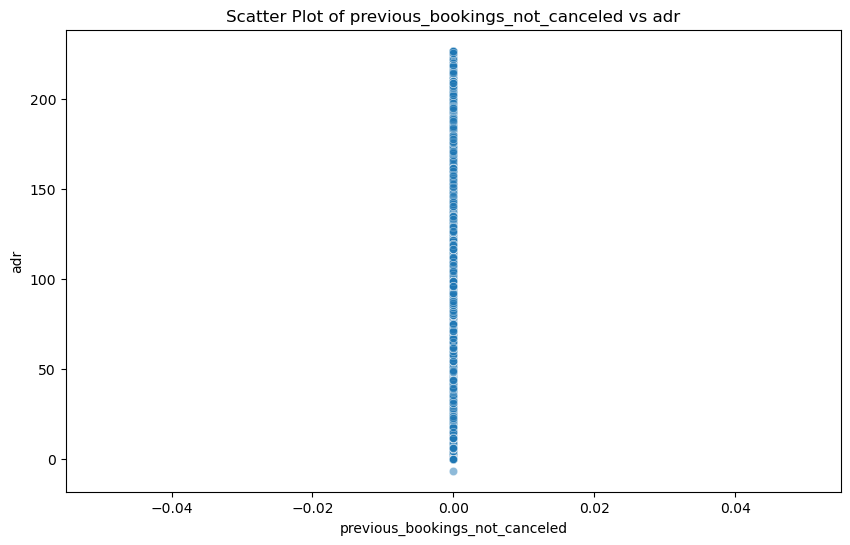

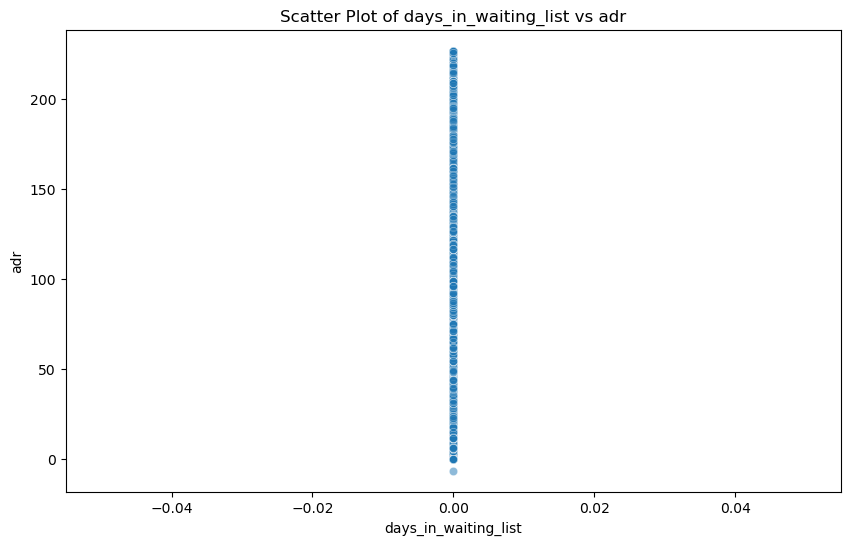

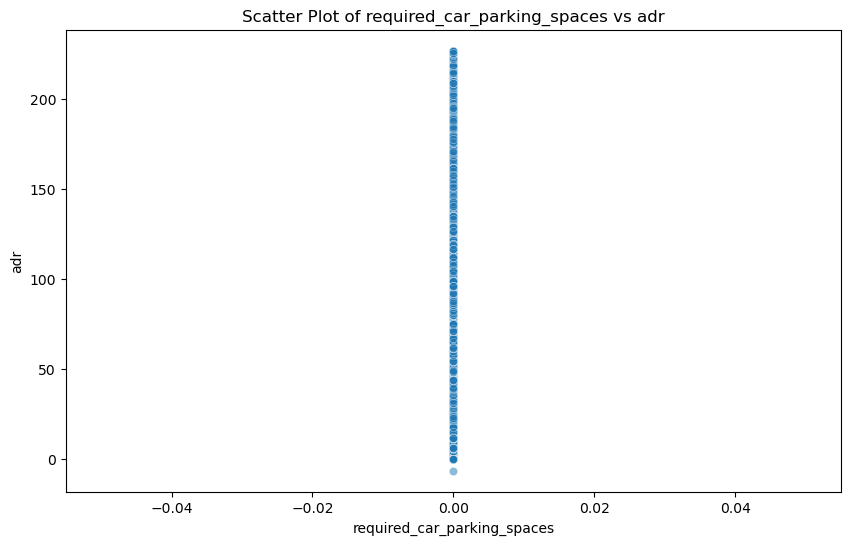

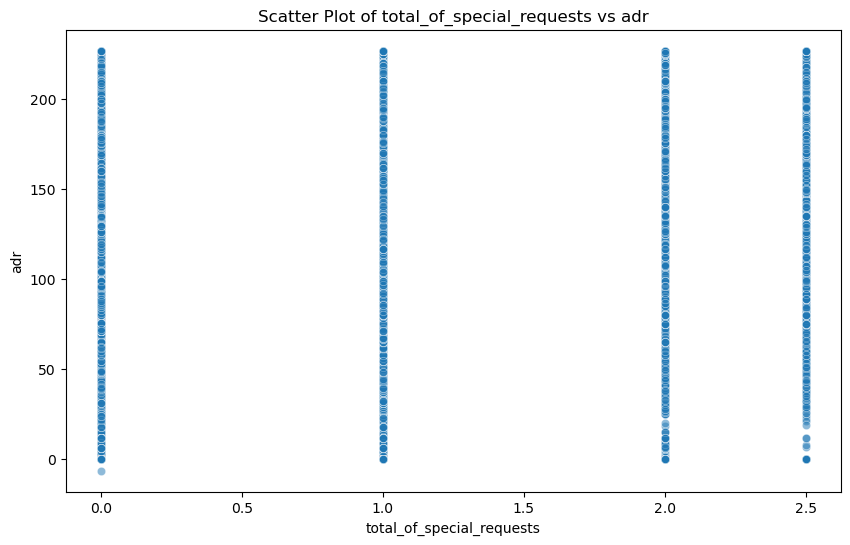

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


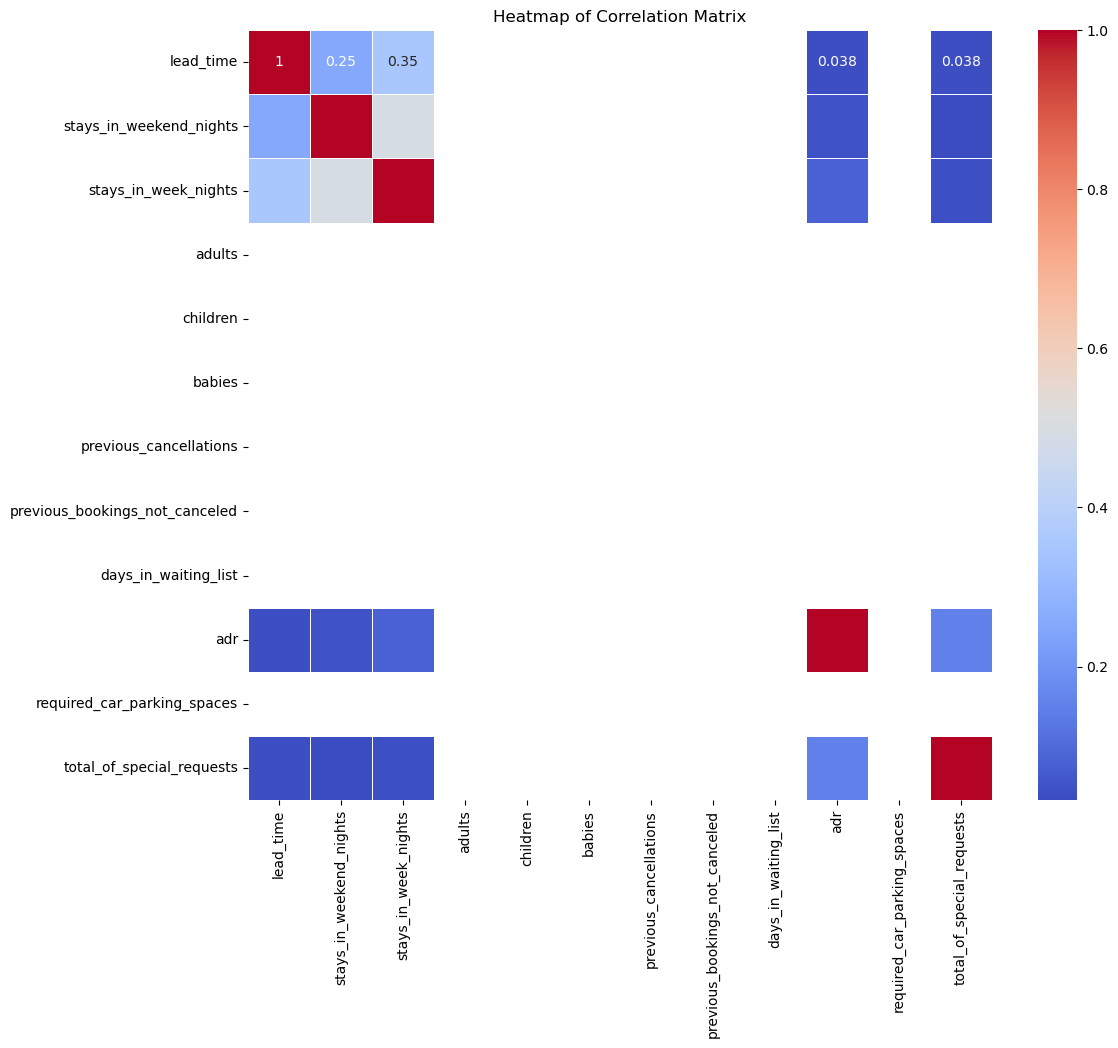

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plots for selected pairs of numerical columns
selected_pairs = [
    ('lead_time', 'adr'),
    ('stays_in_weekend_nights', 'adr'),
    ('stays_in_week_nights', 'adr'),
    ('adults', 'adr'),
    ('children', 'adr'),
    ('babies', 'adr'),
    ('previous_cancellations', 'adr'),
    ('previous_bookings_not_canceled', 'adr'),
    ('days_in_waiting_list', 'adr'),
    ('required_car_parking_spaces', 'adr'),
    ('total_of_special_requests', 'adr')
]

# Create scatter plots for selected pairs
for x, y in selected_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x, y=y, alpha=0.5)
    plt.title(f'Scatter Plot of {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                         'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'adr',
                         'required_car_parking_spaces', 'total_of_special_requests']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


### Use line plots to visualize trends over time for columns like arrival_date_year,
arrival_date_month, arrival_date_week_number, and arrival_date_day_of_month.

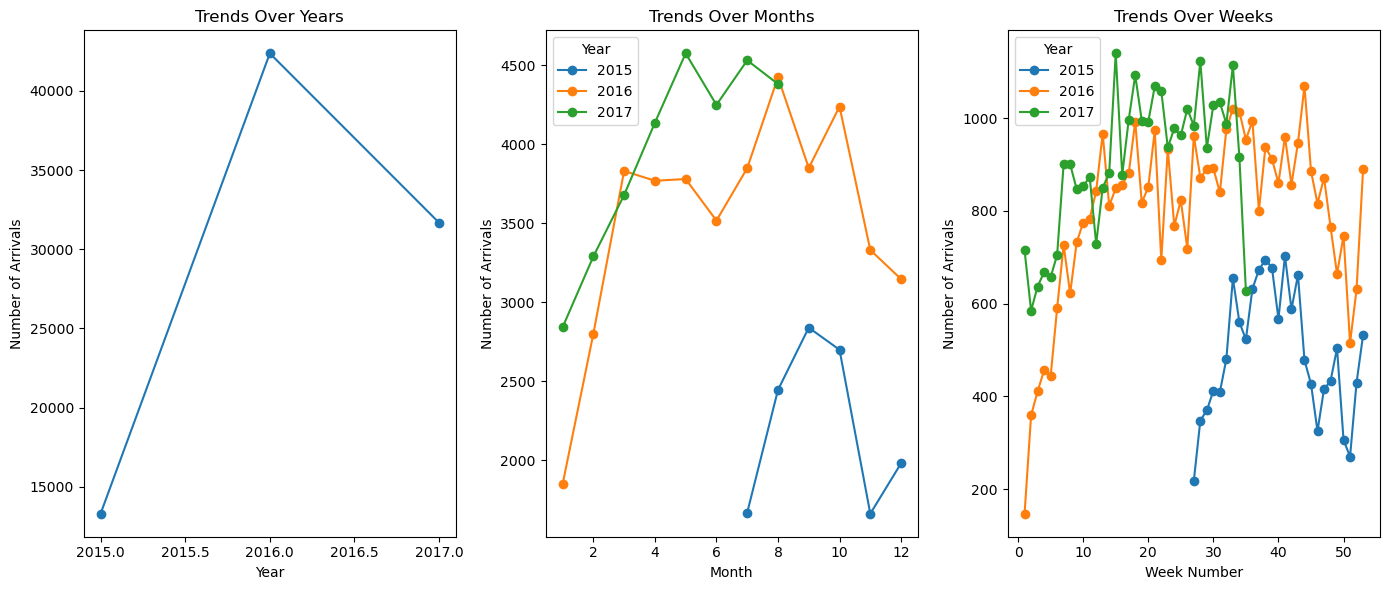

<Figure size 2400x1200 with 0 Axes>

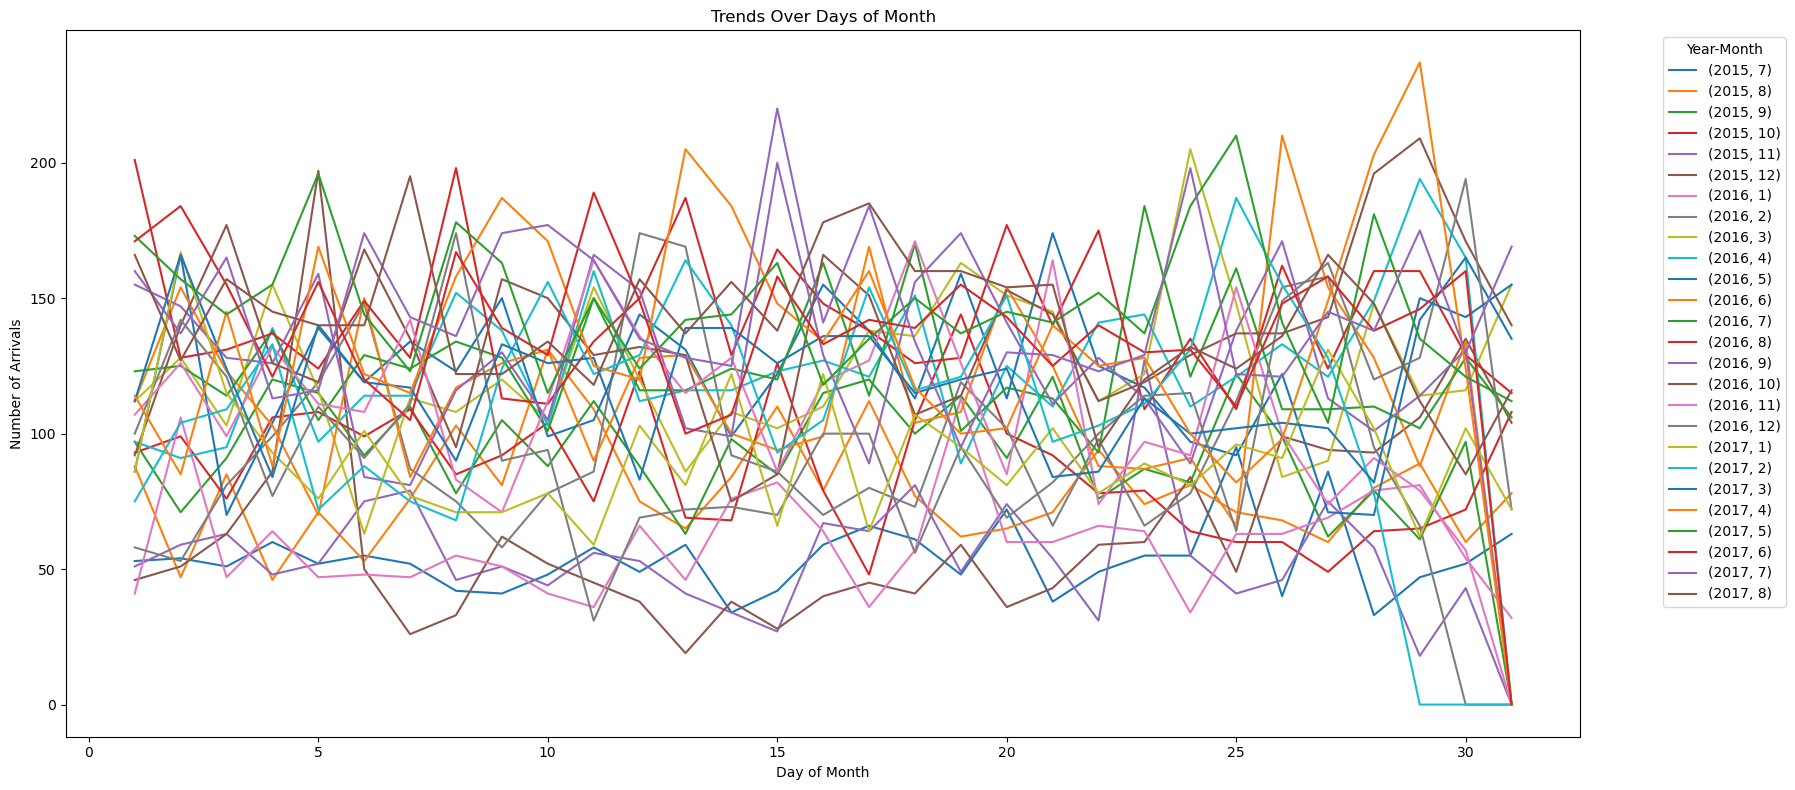

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert arrival_date_month to numerical values
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['arrival_date_month_num'] = df['arrival_date_month'].map(month_mapping)

# Aggregate data
monthly_agg = df.groupby(['arrival_date_year', 'arrival_date_month_num']).size().reset_index(name='count')
weekly_agg = df.groupby(['arrival_date_year', 'arrival_date_week_number']).size().reset_index(name='count')
daily_agg = df.groupby(['arrival_date_year', 'arrival_date_month_num', 'arrival_date_day_of_month']).size().reset_index(name='count')

# Create line plots
plt.figure(figsize=(14, 6))

# Line plot for arrival_date_year
plt.subplot(1, 3, 1)
yearly_agg = df.groupby('arrival_date_year').size()
yearly_agg.plot(kind='line', marker='o')
plt.title('Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Arrivals')

# Line plot for arrival_date_month
plt.subplot(1, 3, 2)
monthly_agg_pivot = monthly_agg.pivot(index='arrival_date_month_num', columns='arrival_date_year', values='count')
monthly_agg_pivot.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Trends Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Arrivals')
plt.legend(title='Year')

# Line plot for arrival_date_week_number
plt.subplot(1, 3, 3)
weekly_agg_pivot = weekly_agg.pivot(index='arrival_date_week_number', columns='arrival_date_year', values='count')
weekly_agg_pivot.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Trends Over Weeks')
plt.xlabel('Week Number')
plt.ylabel('Number of Arrivals')
plt.legend(title='Year')

plt.tight_layout()
plt.show()

# Line plot for arrival_date_day_of_month
# Create an even larger line plot for trends over days of month
plt.figure(figsize=(24, 12))
daily_agg_pivot = daily_agg.pivot_table(index='arrival_date_day_of_month', columns=['arrival_date_year', 'arrival_date_month_num'], values='count', fill_value=0)
daily_agg_pivot.plot(kind='line', figsize=(18,8))
plt.title('Trends Over Days of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Arrivals')
plt.legend(title='Year-Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# Correlation Analysis:

### Calculate the correlation matrix to identify potential relationships between numerical columns. (use pandas df.corr())


In [28]:
# Calculate the correlation matrix for the specified numerical columns
correlation_matrix = df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                         'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'adr',
                         'required_car_parking_spaces', 'total_of_special_requests']].corr()

# Display the correlation matrix
correlation_matrix


lead_time  stays_in_weekend_nights  \
lead_time                        1.000000                 0.254869   
stays_in_weekend_nights          0.254869                 1.000000   
stays_in_week_nights             0.352698                 0.489845   
adults                                NaN                      NaN   
children                              NaN                      NaN   
babies                                NaN                      NaN   
previous_cancellations                NaN                      NaN   
previous_bookings_not_canceled        NaN                      NaN   
days_in_waiting_list                  NaN                      NaN   
adr                              0.037818                 0.048322   
required_car_parking_spaces           NaN                      NaN   
total_of_special_requests        0.038208                 0.032012   

                                stays_in_week_nights  adults  children  \
lead_time                                   0.352698     NaN       NaN   
stays_in_weekend_nights                     0.489845     NaN       NaN   
stays_in_week_nights                        1.000000     NaN       NaN   
adults                                           NaN     NaN       NaN   
children                                         NaN     NaN       NaN   
babies                                           NaN     NaN       NaN   
previous_cancellations                           NaN     NaN       NaN   
previous_bookings_not_canceled                   NaN     NaN       NaN   
days_in_waiting_list                             NaN     NaN       NaN   
adr                                         0.077574     NaN       NaN   
required_car_parking_spaces                      NaN     NaN       NaN   
total_of_special_requests                   0.043110     NaN       NaN   

                                babies  previous_cancellations  \
lead_time                          NaN                     NaN   
stays_in_weekend_nights            NaN                     NaN   
stays_in_week_nights               NaN                     NaN   
adults                             NaN                     NaN   
children                           NaN                     NaN   
babies                             NaN                     NaN   
previous_cancellations             NaN                     NaN   
previous_bookings_not_canceled     NaN                     NaN   
days_in_waiting_list               NaN                     NaN   
adr                                NaN                     NaN   
required_car_parking_spaces        NaN                     NaN   
total_of_special_requests          NaN                     NaN   

                                previous_bookings_not_canceled  \
lead_time                                                  NaN   
stays_in_weekend_nights                                    NaN   
stays_in_week_nights                                       NaN   
adults                                                     NaN   
children                                                   NaN   
babies                                                     NaN   
previous_cancellations                                     NaN   
previous_bookings_not_canceled                             NaN   
days_in_waiting_list                                       NaN   
adr                                                        NaN   
required_car_parking_spaces                                NaN   
total_of_special_requests                                  NaN   

                                days_in_waiting_list       adr  \
lead_time                                        NaN  0.037818   
stays_in_weekend_nights                          NaN  0.048322   
stays_in_week_nights                             NaN  0.077574   
adults                                           NaN       NaN   
children                                         NaN       NaN   
babies                                      

### Visualize the correlation matrix using a heatmap.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


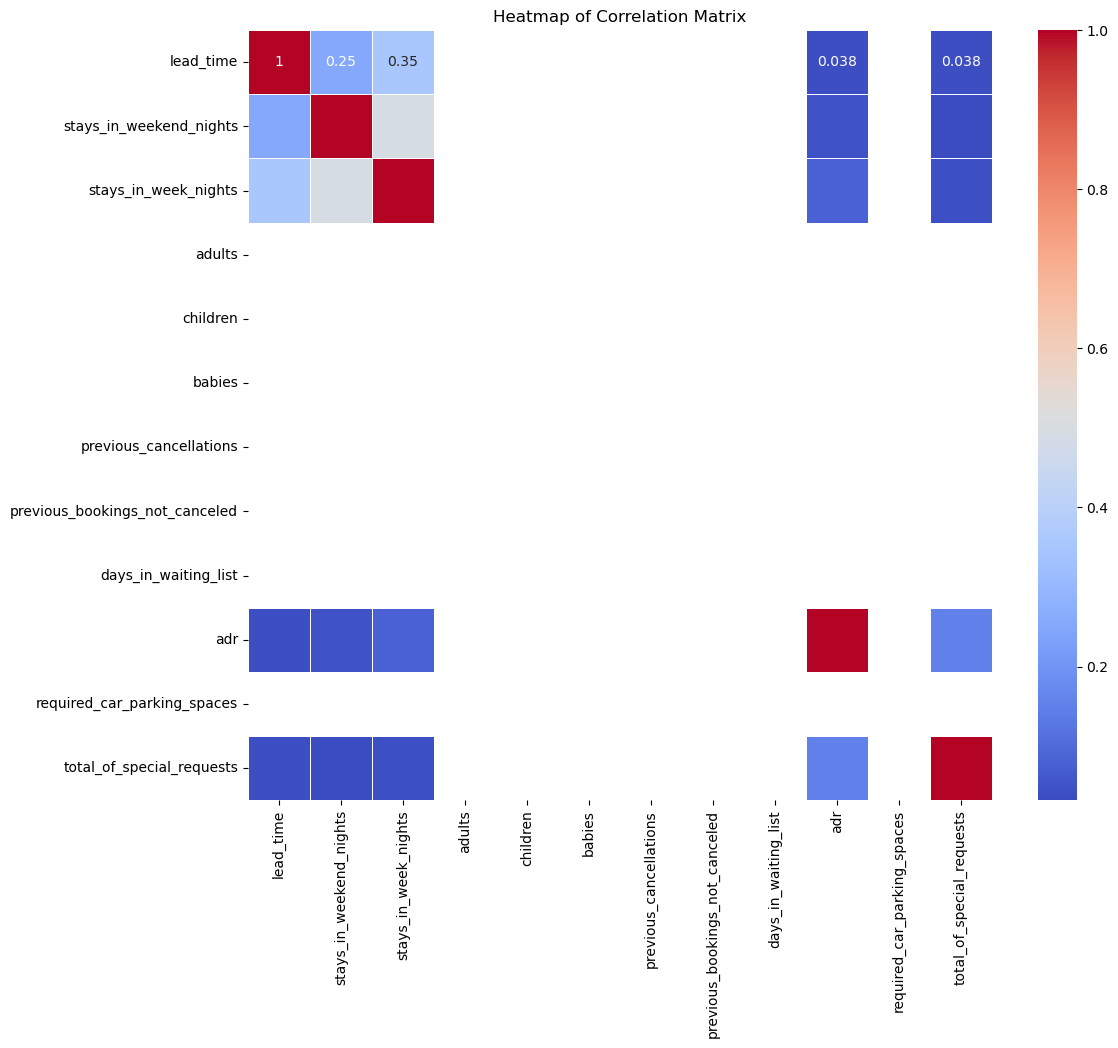

In [29]:
# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


# Categorical Data Analysis:

In [30]:
import pandas as pd

# Identify categorical columns for one-hot encoding
categorical_columns = [
    'hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 
    'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status'
]

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the encoded dataframe
df_encoded.head()


is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0        296               2015                        27   
1            0        296               2015                        27   
2            0          7               2015                        27   
3            0         13               2015                        27   
4            0         14               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                   0.0   
1                          1                        0                   0.0   
2                          1                        0                   1.0   
3                          1                        0                   1.0   
4                          1                        0                   2.0   

   adults  children  babies  ...  deposit_type_No Deposit  \
0     2.0       0.0       0  ...                     True   
1     2.0       0.0       0  ...                     True   
2     2.0       0.0       0  ...                     True   
3     2.0       0.0       0  ...                     True   
4     2.0       0.0       0  ...                     True   

   deposit_type_Non Refund  deposit_type_Refundable  customer_type_Contract  \
0                    False                    False                   False   
1                    False                    False                   False   
2                    False                    False                   False   
3                    False                    False                   False   
4                    False                    False                   False   

   customer_type_Group  customer_type_Transient  \
0                False                     True   
1                False                     True   
2                False                     True   
3                False                     True   
4                False                     True   

   customer_type_Transient-Party  reservation_status_Canceled  \
0                          False                        False   
1                          False                        False   
2                          False                        False   
3                          False                        False   
4                          False                        False   

  reservation_status_Check-Out  reservation_status_No-Show  
0                         True                       False  
1                         True                       False  
2                         True                       False  
3                         True                       False  
4                         True                       False  

[5 rows x 260 columns]

### label encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original dataframe to apply label encoding
df_label_encoded = df.copy()

# Initialize the label encoder
label_encoder = LabelEncoder()

# Identify the categorical columns to label encode
categorical_columns = [
    'hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 
    'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status'
]

# Apply label encoding to each categorical column
for column in categorical_columns:
    df_label_encoded[column] = label_encoder.fit_transform(df_label_encoded[column])

# Display the first few rows of the label-encoded dataframe
df_label_encoded.head()


hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0      1            0        296               2015                   5   
1      1            0        296               2015                   5   
2      1            0          7               2015                   5   
3      1            0         13               2015                   5   
4      1            0         14               2015                   5   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                   0.0     2.0  ...   
1                        0                   0.0     2.0  ...   
2                        0                   1.0     2.0  ...   
3                        0                   1.0     2.0  ...   
4                        0                   2.0     2.0  ...   

   booking_changes  deposit_type  days_in_waiting_list  customer_type   adr  \
0                0             0                     0              2   0.0   
1                0             0                     0              2   0.0   
2                0             0                     0              2  75.0   
3                0             0                     0              2  75.0   
4                0             0                     0              2  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                        0.0                   1   
1                            0                        0.0                   1   
2                            0                        0.0                   1   
3                            0                        0.0                   1   
4                            0                        1.0                   1   

   reservation_status_date  arrival_date_month_num  
0               01/07/2015                       7  
1               01/07/2015                       7  
2               02/07/2015                       7  
3               02/07/2015                       7  
4               03/07/2015                       7  

[5 rows x 31 columns]

### Analyze categorical columns like hotel, country, market_segment,distribution_channel, reserved_room_type, assigned_room_type, deposit_type, agent, company, customer_type, and reservation_status to identify patterns or trends.




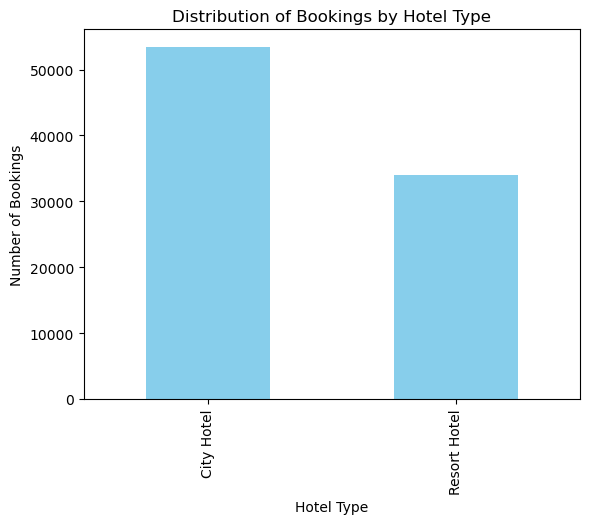

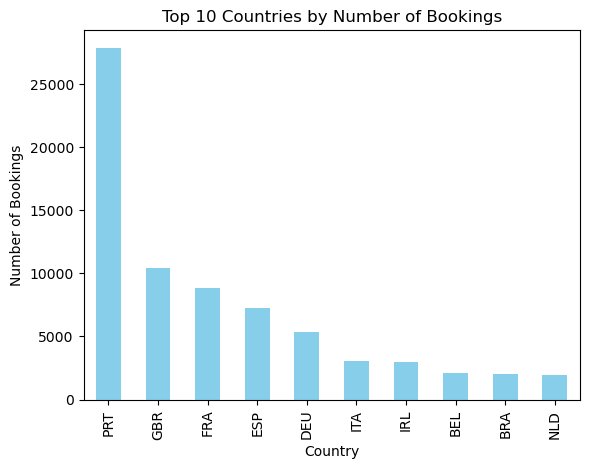

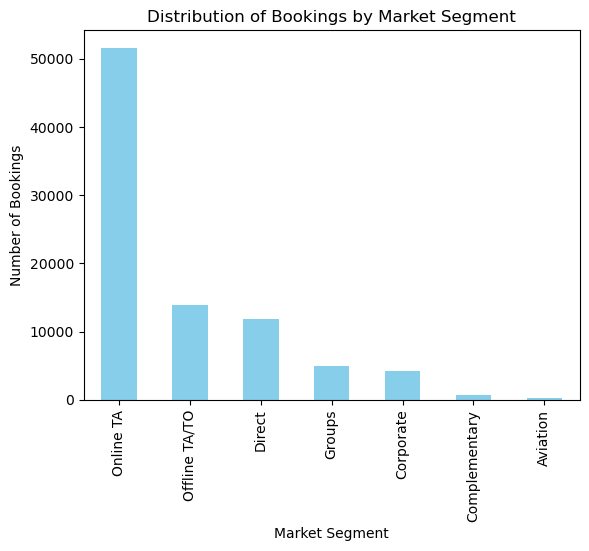

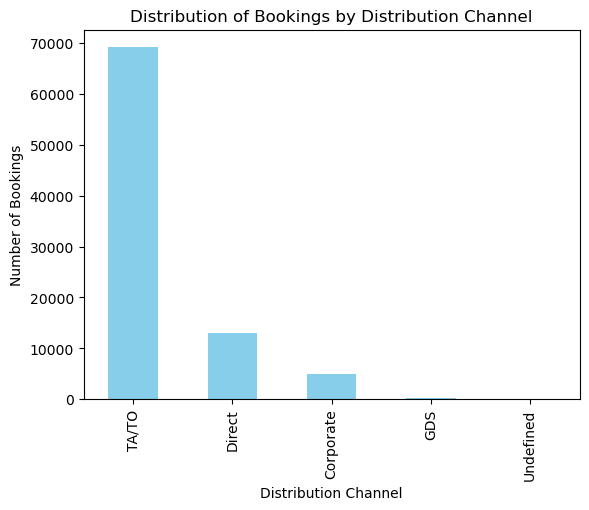

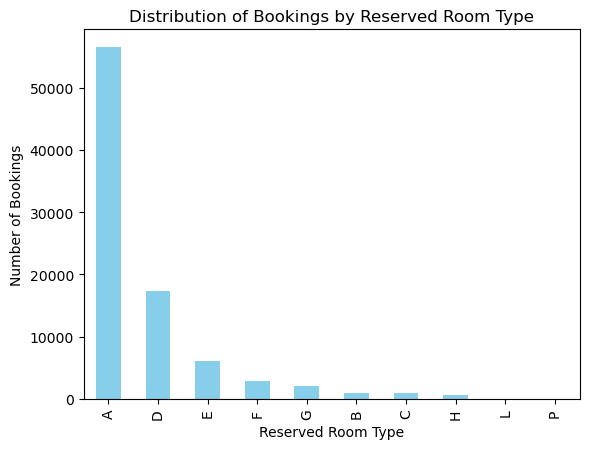

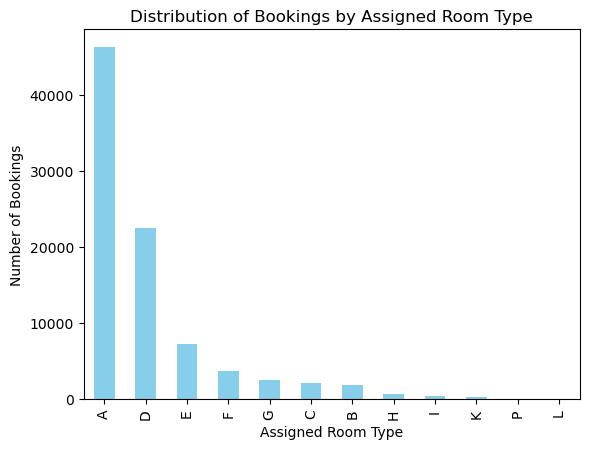

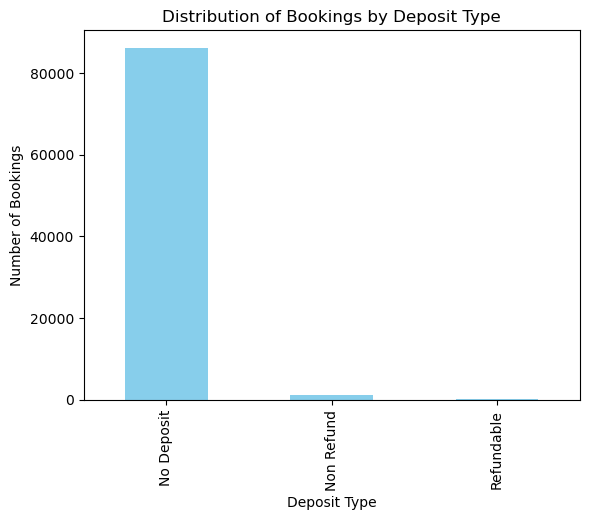

KeyError: 'agent'

In [32]:
import matplotlib.pyplot as plt

# Count of bookings for each hotel type
hotel_counts = df['hotel'].value_counts()
hotel_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bookings by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()

# Count of bookings for each country
country_counts = df['country'].value_counts().nlargest(10)
country_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Number of Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.show()

# Count of bookings for each market segment
market_segment_counts = df['market_segment'].value_counts()
market_segment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bookings by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.show()

# Count of bookings for each distribution channel
distribution_channel_counts = df['distribution_channel'].value_counts()
distribution_channel_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bookings by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.show()

# Count of bookings for each reserved room type
reserved_room_type_counts = df['reserved_room_type'].value_counts()
reserved_room_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bookings by Reserved Room Type')
plt.xlabel('Reserved Room Type')
plt.ylabel('Number of Bookings')
plt.show()

# Count of bookings for each assigned room type
assigned_room_type_counts = df['assigned_room_type'].value_counts()
assigned_room_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bookings by Assigned Room Type')
plt.xlabel('Assigned Room Type')
plt.ylabel('Number of Bookings')
plt.show()

# Count of bookings for each deposit type
deposit_type_counts = df['deposit_type'].value_counts()
deposit_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bookings by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Number of Bookings')
plt.show()

# Count of bookings for each agent
agent_counts = df['agent'].value_counts().nlargest(10)
agent_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Agents by Number of Bookings')
plt.xlabel('Agent')
plt.ylabel('Number of Bookings')
plt.show()

# Count of bookings for each company
company_counts = df['company'].value_counts().nlargest(10)
company_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Companies by Number of Bookings')
plt.xlabel('Company')
plt.ylabel('Number of Bookings')
plt.show()

# Count of bookings for each customer type
customer_type_counts = df['customer_type'].value_counts()
customer_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bookings by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.show()

# Count of bookings for each reservation status
reservation_status_counts = df['reservation_status'].value_counts()
reservation_status_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Bookings by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Number of Bookings')
plt.show()


In [34]:
# Function to create a contingency table
def create_contingency_table(column1, column2):
    table = pd.crosstab(df[column1], df[column2])
    return table

# Example pairs of categorical columns
pairs = [
    ('hotel', 'customer_type'),
    ('market_segment', 'distribution_channel'),
    ('reserved_room_type', 'assigned_room_type'),
    ('deposit_type', 'reservation_status')
]

# Generate contingency tables for the selected pairs
for col1, col2 in pairs:
    table = create_contingency_table(col1, col2)
    print(f'Contingency Table for {col1} and {col2}:\n', table, '\n')


Contingency Table for hotel and customer_type:
 customer_type  Contract  Group  Transient  Transient-Party
hotel                                                     
City Hotel         1471    271      44636             7036
Resort Hotel       1666    273      27316             4675 

Contingency Table for market_segment and distribution_channel:
 distribution_channel  Corporate  Direct  GDS  TA/TO  Undefined
market_segment                                                
Aviation                    217       0    0     10          0
Complementary                81     546    0     75          0
Corporate                  3891     154    0    155          0
Direct                       82   11482    1    229          1
Groups                      669     649    0   3624          0
Offline TA/TO                95      16   44  13719          0
Online TA                    34     131  136  51303          0 

Contingency Table for reserved_room_type and assigned_room_type:
 assigned_room_t

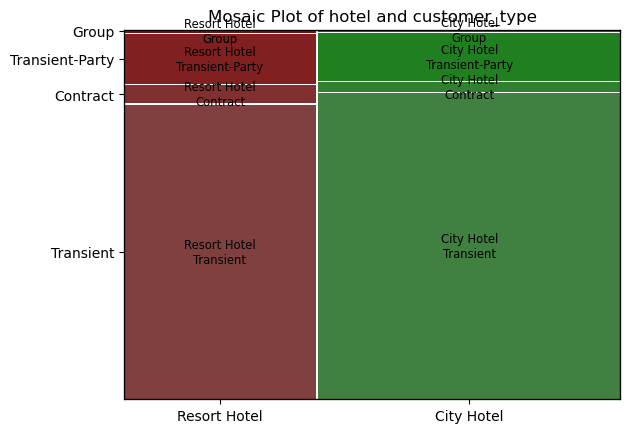

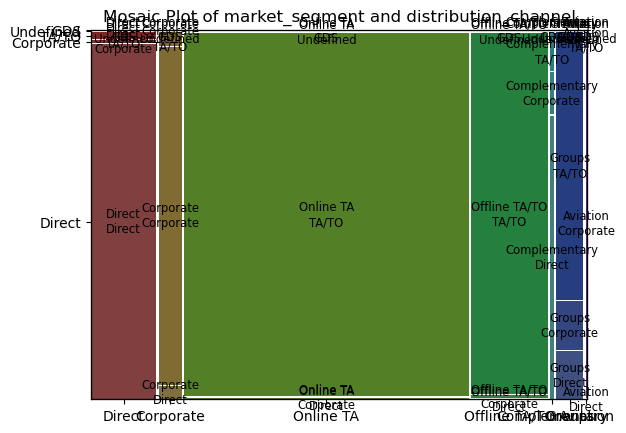

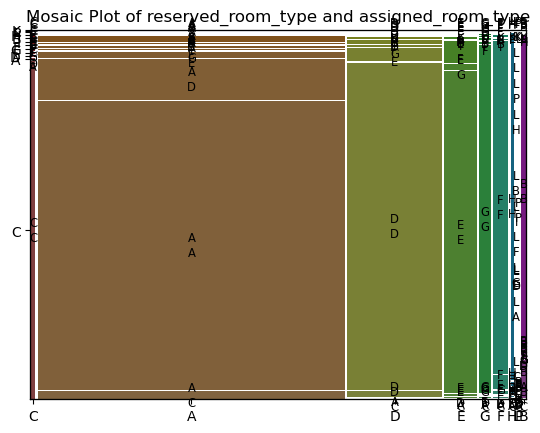

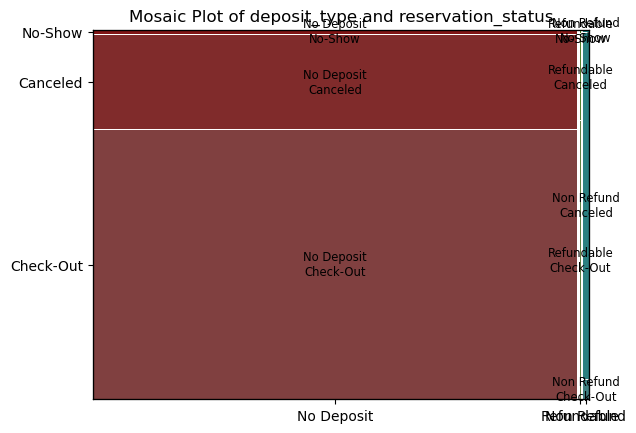

In [35]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Function to create a mosaic plot
def create_mosaic_plot(column1, column2):
    mosaic(df, [column1, column2], title=f'Mosaic Plot of {column1} and {column2}')
    plt.show()

# Generate mosaic plots for the selected pairs
for col1, col2 in pairs:
    create_mosaic_plot(col1, col2)


# Time series analysis

### Analyze the arrival_date_year, arrival_date_month, arrival_date_week_number,
and arrival_date_day_of_month columns to identify seasonality or trends in
bookings over time.

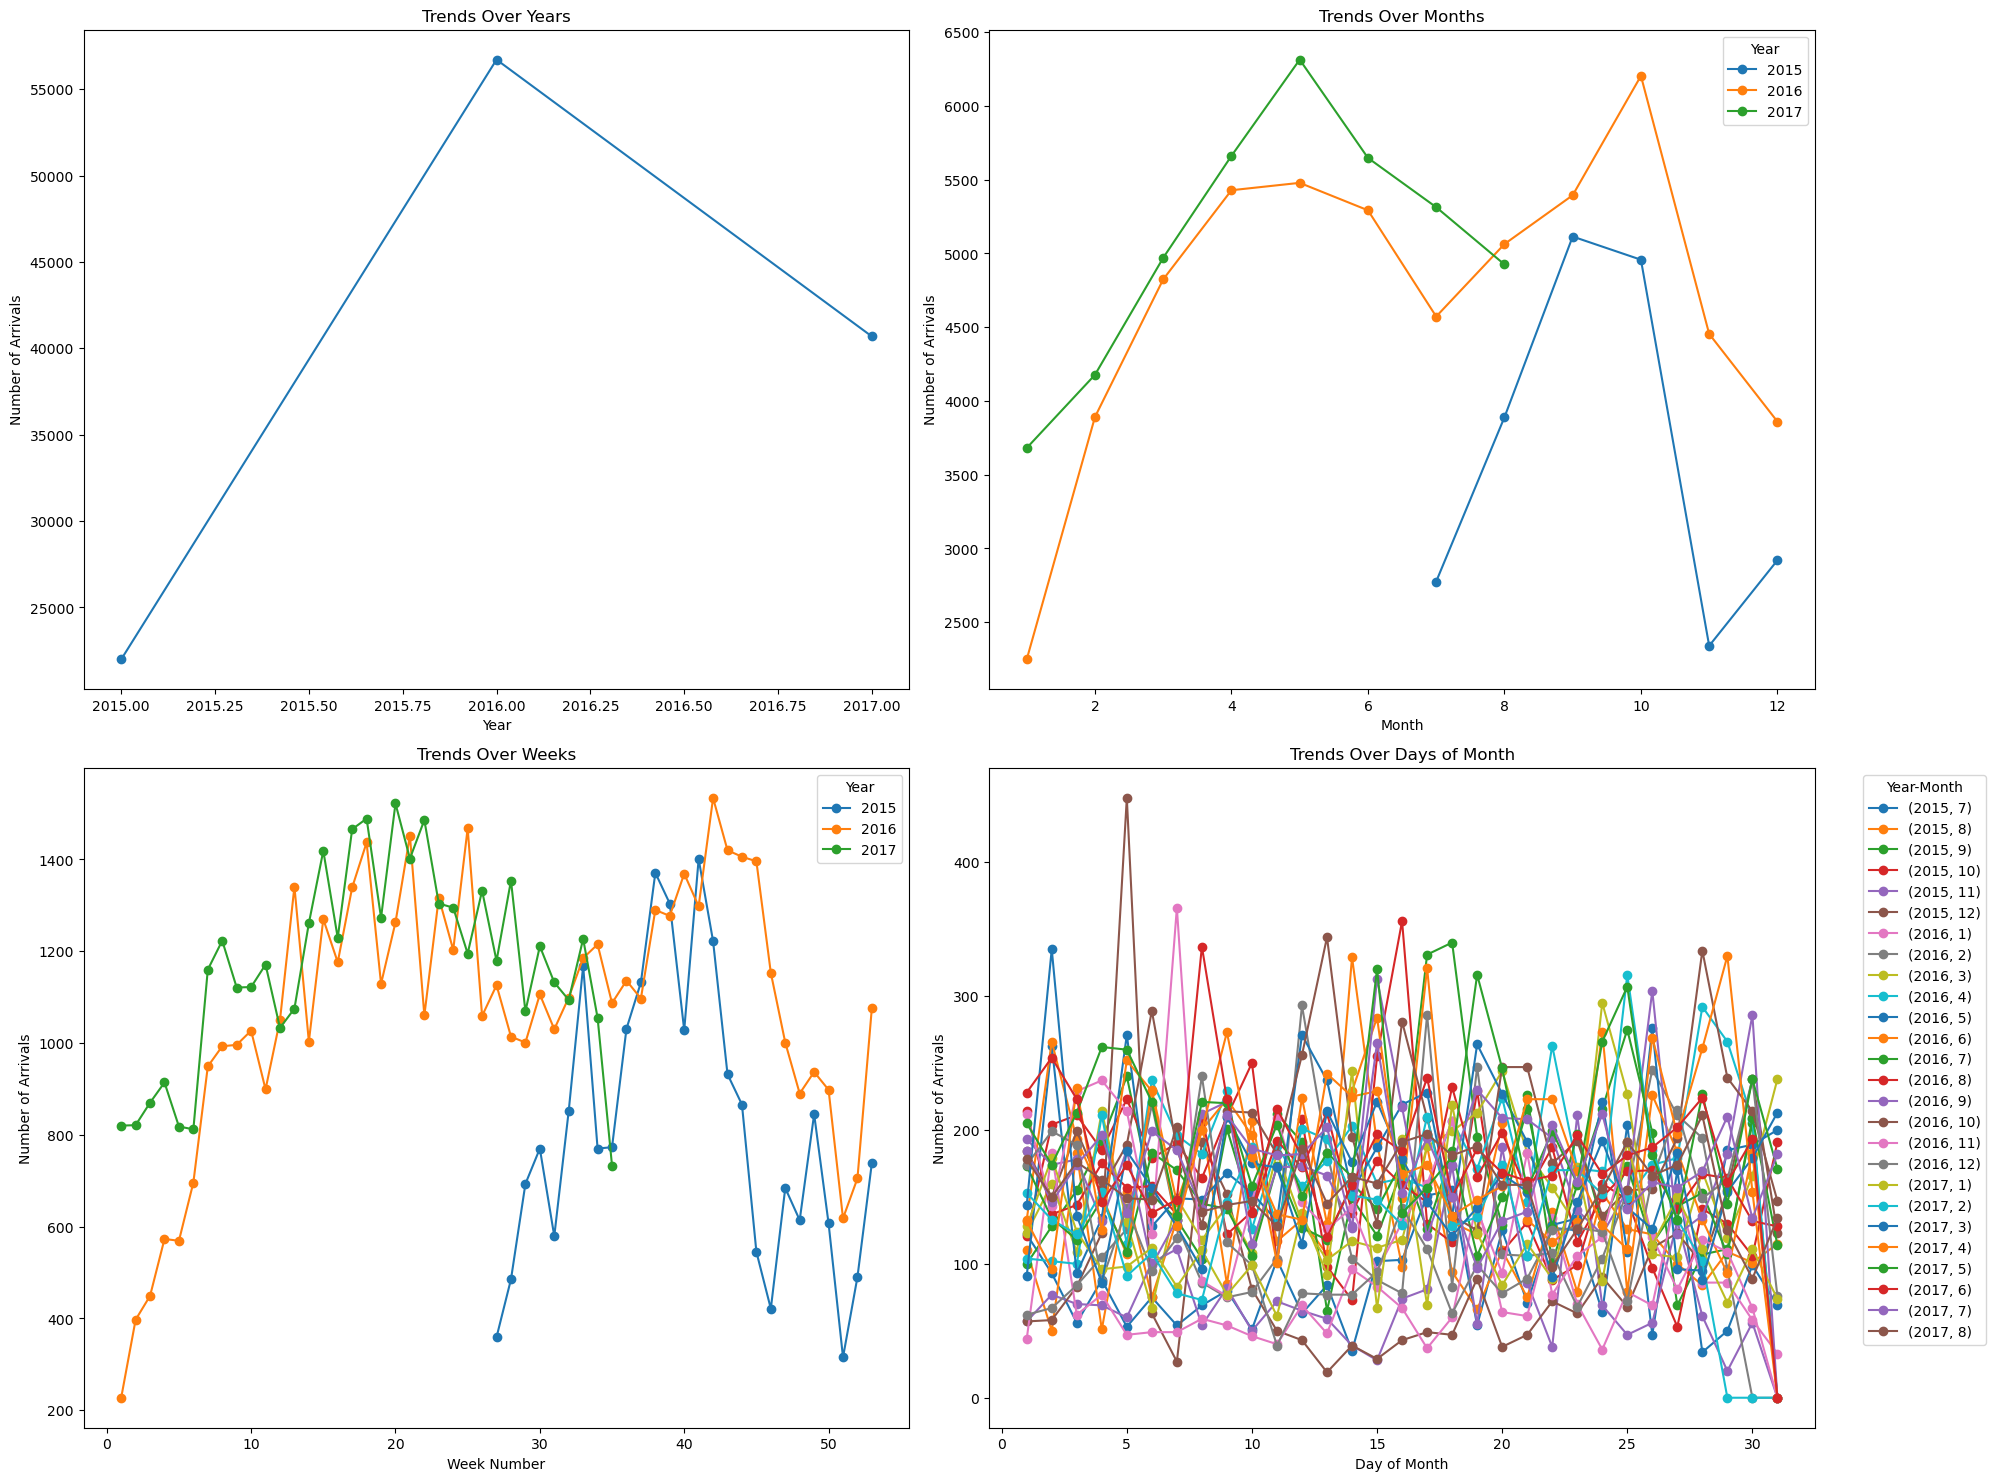

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('hotel_bookings.csv')  # Replace with your local path

# Convert 'arrival_date_month' from string to numerical values
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['arrival_date_month_num'] = df['arrival_date_month'].map(month_mapping)

# Aggregate data
yearly_agg = df.groupby('arrival_date_year').size()
monthly_agg = df.groupby(['arrival_date_year', 'arrival_date_month_num']).size().reset_index(name='count')
weekly_agg = df.groupby(['arrival_date_year', 'arrival_date_week_number']).size().reset_index(name='count')
daily_agg = df.groupby(['arrival_date_year', 'arrival_date_month_num', 'arrival_date_day_of_month']).size().reset_index(name='count')

# Create larger line plots
plt.figure(figsize=(20, 15))

# Line plot for arrival_date_year
plt.subplot(2, 2, 1)
yearly_agg.plot(kind='line', marker='o')
plt.title('Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Arrivals')

# Line plot for arrival_date_month
plt.subplot(2, 2, 2)
monthly_agg_pivot = monthly_agg.pivot(index='arrival_date_month_num', columns='arrival_date_year', values='count')
monthly_agg_pivot.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Trends Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Arrivals')
plt.legend(title='Year')

# Line plot for arrival_date_week_number
plt.subplot(2, 2, 3)
weekly_agg_pivot = weekly_agg.pivot(index='arrival_date_week_number', columns='arrival_date_year', values='count')
weekly_agg_pivot.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Trends Over Weeks')
plt.xlabel('Week Number')
plt.ylabel('Number of Arrivals')
plt.legend(title='Year')

# Line plot for arrival_date_day_of_month
plt.subplot(2, 2, 4)
daily_agg_pivot = daily_agg.pivot_table(index='arrival_date_day_of_month', columns=['arrival_date_year', 'arrival_date_month_num'], values='count', fill_value=0)
daily_agg_pivot.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Trends Over Days of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Arrivals')
plt.legend(title='Year-Month', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Create time series plots or decompose the time series to understand the trend,
seasonality, and residuals.

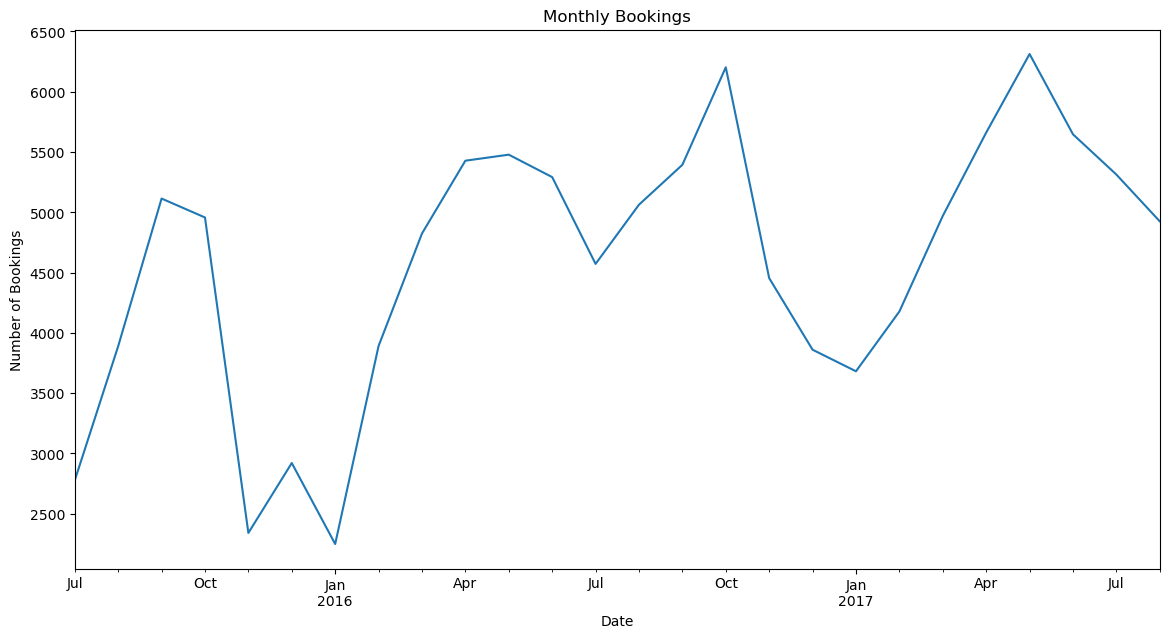

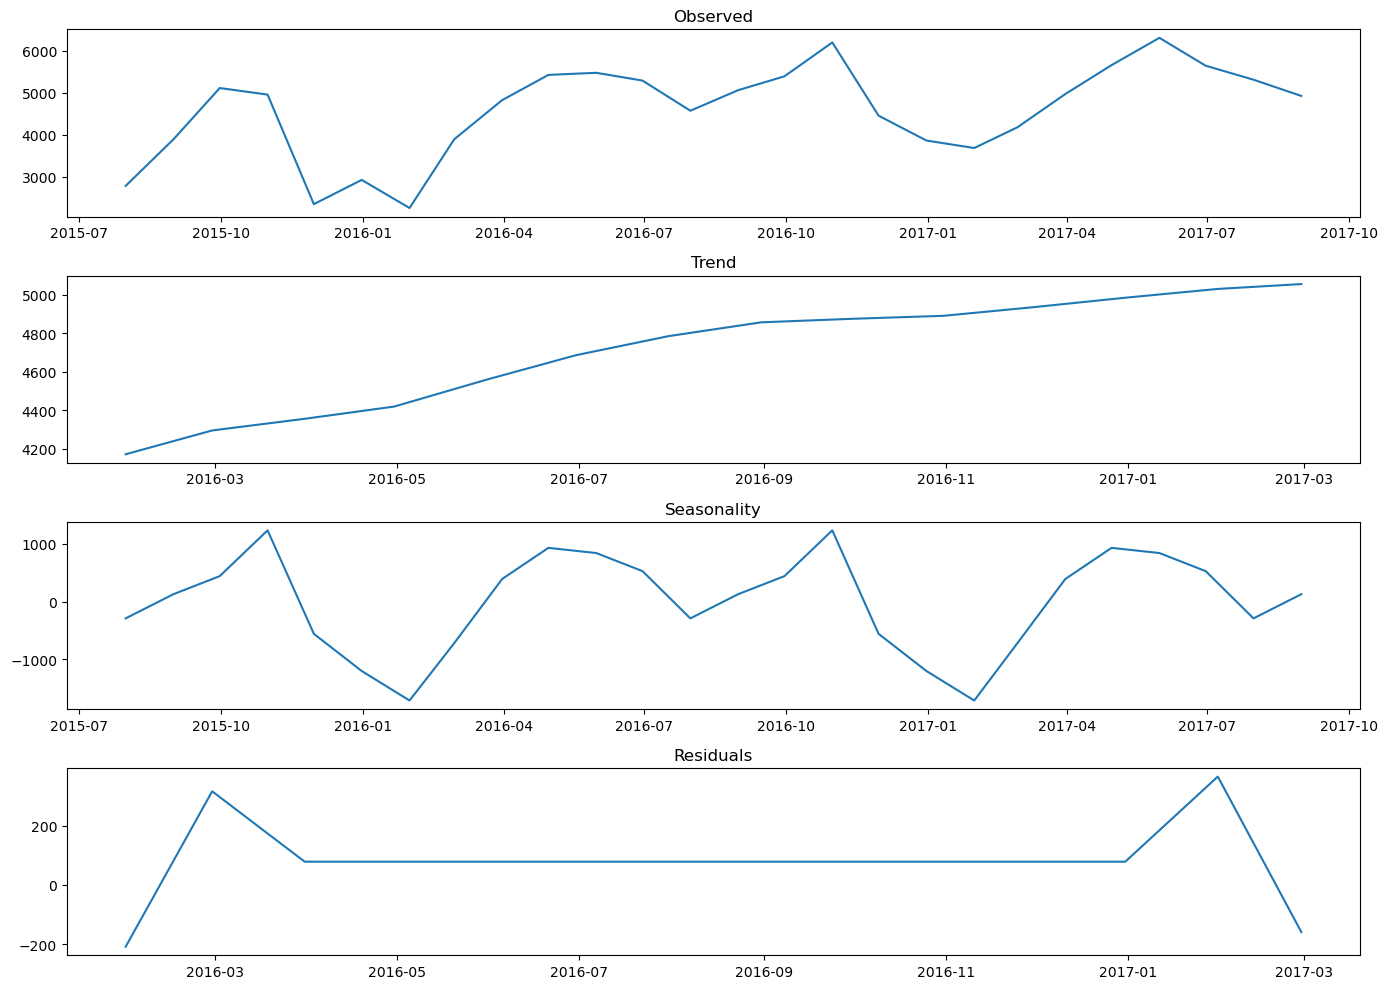

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
df = pd.read_csv('hotel_bookings.csv')  # Replace with your local path

# Convert 'arrival_date_month' from string to numerical values
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['arrival_date_month_num'] = df['arrival_date_month'].map(month_mapping)

# Create a datetime column
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month_num'].astype(str) + '-' +
                                    df['arrival_date_day_of_month'].astype(str), errors='coerce')

# Aggregate data by month
monthly_bookings = df.groupby(pd.Grouper(key='arrival_date', freq='M')).size()

# Drop any rows with missing values
monthly_bookings = monthly_bookings.dropna()

# Plot the time series
plt.figure(figsize=(14, 7))
monthly_bookings.plot()
plt.title('Monthly Bookings')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(monthly_bookings, model='additive')

# Plot the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed)
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid)
plt.title('Residuals')

plt.tight_layout()
plt.show()


# feature engineering

Create new features based on existing columns, such as calculating the duration
of stay from stays_in_weekend_nights and stays_in_week_nights.

In [39]:
import pandas as pd

# Load the dataset
df = pd.read_csv('hotel_bookings.csv')  # Replace with your local path

# Calculate the duration of stay
df['duration_of_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Calculate the total number of guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# Determine if the booking is for a family (more than 1 guest)
df['is_family'] = df['total_guests'] > 1

# Display the first few rows of the updated dataframe
df[['stays_in_weekend_nights', 'stays_in_week_nights', 'duration_of_stay', 'adults', 'children', 'babies', 'total_guests', 'is_family']].head()


stays_in_weekend_nights  stays_in_week_nights  duration_of_stay  adults  \
0                        0                     0                 0     2.0   
1                        0                     0                 0     2.0   
2                        0                     1                 1     1.0   
3                        0                     1                 1     1.0   
4                        0                     2                 2     2.0   

   children  babies  total_guests  is_family  
0       0.0       0           2.0       True  
1       0.0       0           2.0       True  
2       0.0       0           1.0      False  
3       0.0       0           1.0      False  
4       0.0       0           2.0       True

In [40]:
import pandas as pd

# Load the dataset
df = pd.read_csv('hotel_bookings.csv')  # Replace with your local path

# Convert 'arrival_date_month' from string to numerical values
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['arrival_date_month_num'] = df['arrival_date_month'].map(month_mapping)

# Create a datetime column
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month_num'].astype(str) + '-' +
                                    df['arrival_date_day_of_month'].astype(str), errors='coerce')

# Derive new features
# Season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['arrival_date'].dt.month.apply(get_season)

# Month name
df['month_name'] = df['arrival_date'].dt.month_name()

# Day of the week
df['day_of_week'] = df['arrival_date'].dt.day_name()

# Display the first few rows of the updated dataframe
df[['arrival_date', 'season', 'month_name', 'day_of_week']].head()


arrival_date  season month_name day_of_week
0   2015-07-01  Summer       July   Wednesday
1   2015-07-01  Summer       July   Wednesday
2   2015-07-01  Summer       July   Wednesday
3   2015-07-01  Summer       July   Wednesday
4   2015-07-01  Summer       July   Wednesday

# Handling Datetime Columns:

Convert the reservation_status_date column to datetime format if necessary.

In [41]:
import pandas as pd

# Load the dataset
df = pd.read_csv('hotel_bookings.csv')  # Replace with your local path

# Convert 'reservation_status_date' to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

# Display the first few rows of the updated dataframe to verify the conversion
df[['reservation_status_date']].head()


reservation_status_date
0              2015-01-07
1              2015-01-07
2              2015-02-07
3              2015-02-07
4              2015-03-07

Extract additional features from the datetime column, such as day of the week,
month, or hour.

In [45]:
import pandas as pd

# Load the dataset
df = pd.read_csv('hotel_bookings.csv')  # Replace with your local path

# Convert 'reservation_status_date' to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

# Extract additional features
df['reservation_day_of_week'] = df['reservation_status_date'].dt.day_name()
df['reservation_month'] = df['reservation_status_date'].dt.month
df['reservation_hour'] = df['reservation_status_date'].dt.hour

# Display the first few rows of the updated dataframe to verify the new features
df[['reservation_status_date', 'reservation_day_of_week', 'reservation_month', 'reservation_hour']].head()


reservation_status_date reservation_day_of_week  reservation_month  \
0              2015-01-07               Wednesday                1.0   
1              2015-01-07               Wednesday                1.0   
2              2015-02-07                Saturday                2.0   
3              2015-02-07                Saturday                2.0   
4              2015-03-07                Saturday                3.0   

   reservation_hour  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [46]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')


In [47]:
df['reservation_day_of_week'] = df['reservation_status_date'].dt.day_name()
df['reservation_month'] = df['reservation_status_date'].dt.month
df['reservation_hour'] = df['reservation_status_date'].dt.hour

In [48]:
df[['reservation_status_date', 'reservation_day_of_week', 'reservation_month', 'reservation_hour']].head()


reservation_status_date reservation_day_of_week  reservation_month  \
0              2015-01-07               Wednesday                1.0   
1              2015-01-07               Wednesday                1.0   
2              2015-02-07                Saturday                2.0   
3              2015-02-07                Saturday                2.0   
4              2015-03-07                Saturday                3.0   

   reservation_hour  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0